___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [346]:
#Importing Necessary Packages
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)
from sklearn.metrics import roc_auc_score

In [347]:
#Read the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
df=dataset.copy()
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [348]:
#Printing the dataset "First 5 rows"
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [349]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


it seems like we dont have null values

In [350]:
# Droping unnecessary features and check the DF:
print(f"The  DataFrame BEFORE dropping unnecessary features: rows are {df.shape[0]} and columns are {df.shape[1]}")
df = df.drop(["CustomerId", "RowNumber", "Surname"], axis=1)
print(f"The  DataFrame AFTER dropping unnecessary features: rows are {df.shape[0]} and columns are {df.shape[1]}")

The  DataFrame BEFORE dropping unnecessary features: rows are 10000 and columns are 14
The  DataFrame AFTER dropping unnecessary features: rows are 10000 and columns are 11


as you can see from above:
there are features that not usefull in the predection process so it is better to remove it 

In [351]:
# Check for null values
df.isna().sum().sum()

0

In [352]:
# Check for duplicated rows
df.duplicated().sum()

0

In [353]:
# Describe the dataset statistically 
df.describe().T

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
Exited                0.000       0.0000       1.00

In [354]:
# Check which feature is an "String"
cat = df.select_dtypes("object").columns
cat

Index(['Geography', 'Gender'], dtype='object')

Text(0.5, 1.0, 'Features Distribution')

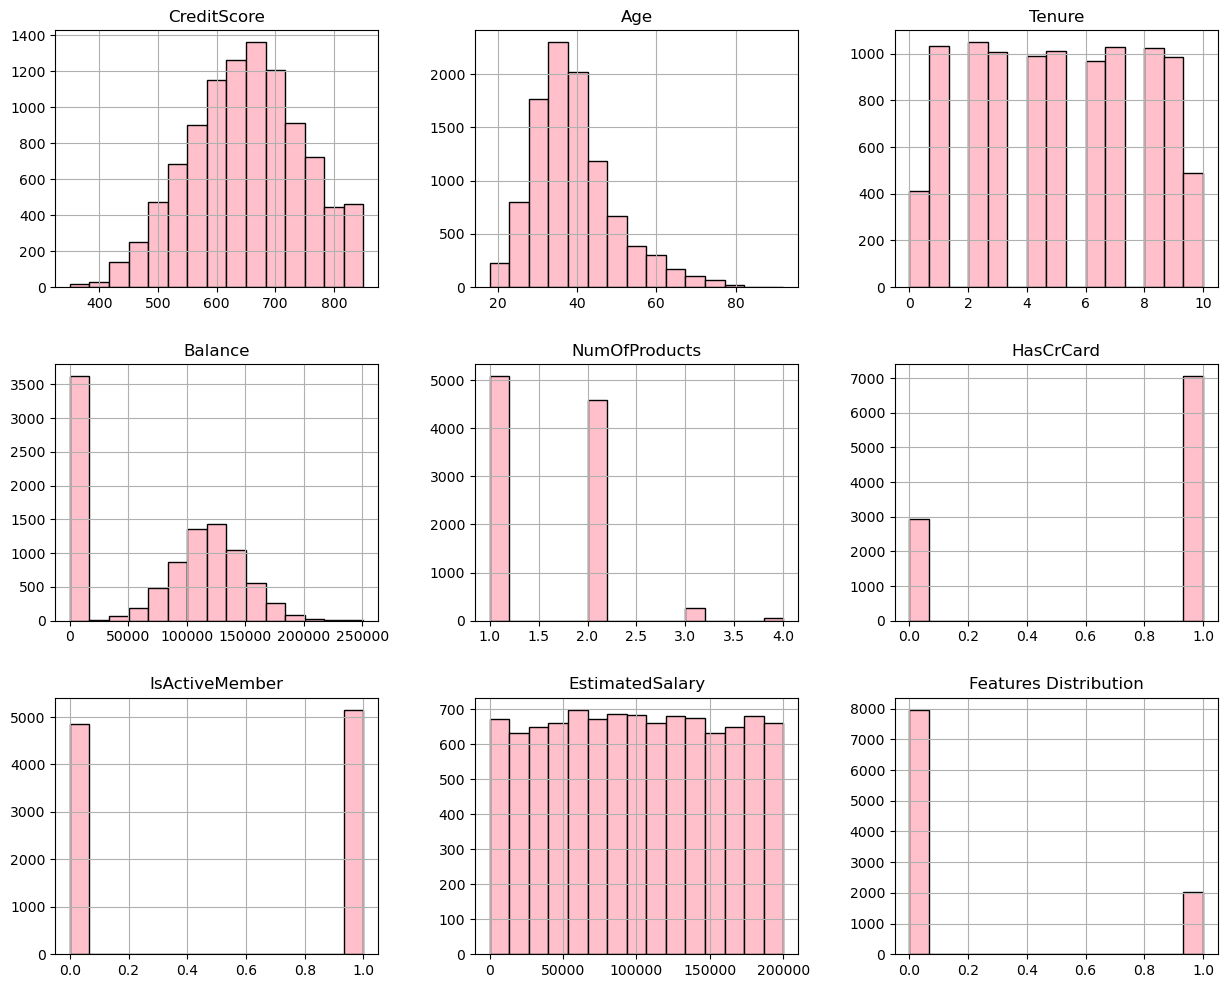

In [355]:
# This code creates a histogram to visualize the distribution of data
df.hist(figsize=(15, 12), bins=15, color='pink', edgecolor='black')
plt.title("Features Distribution")

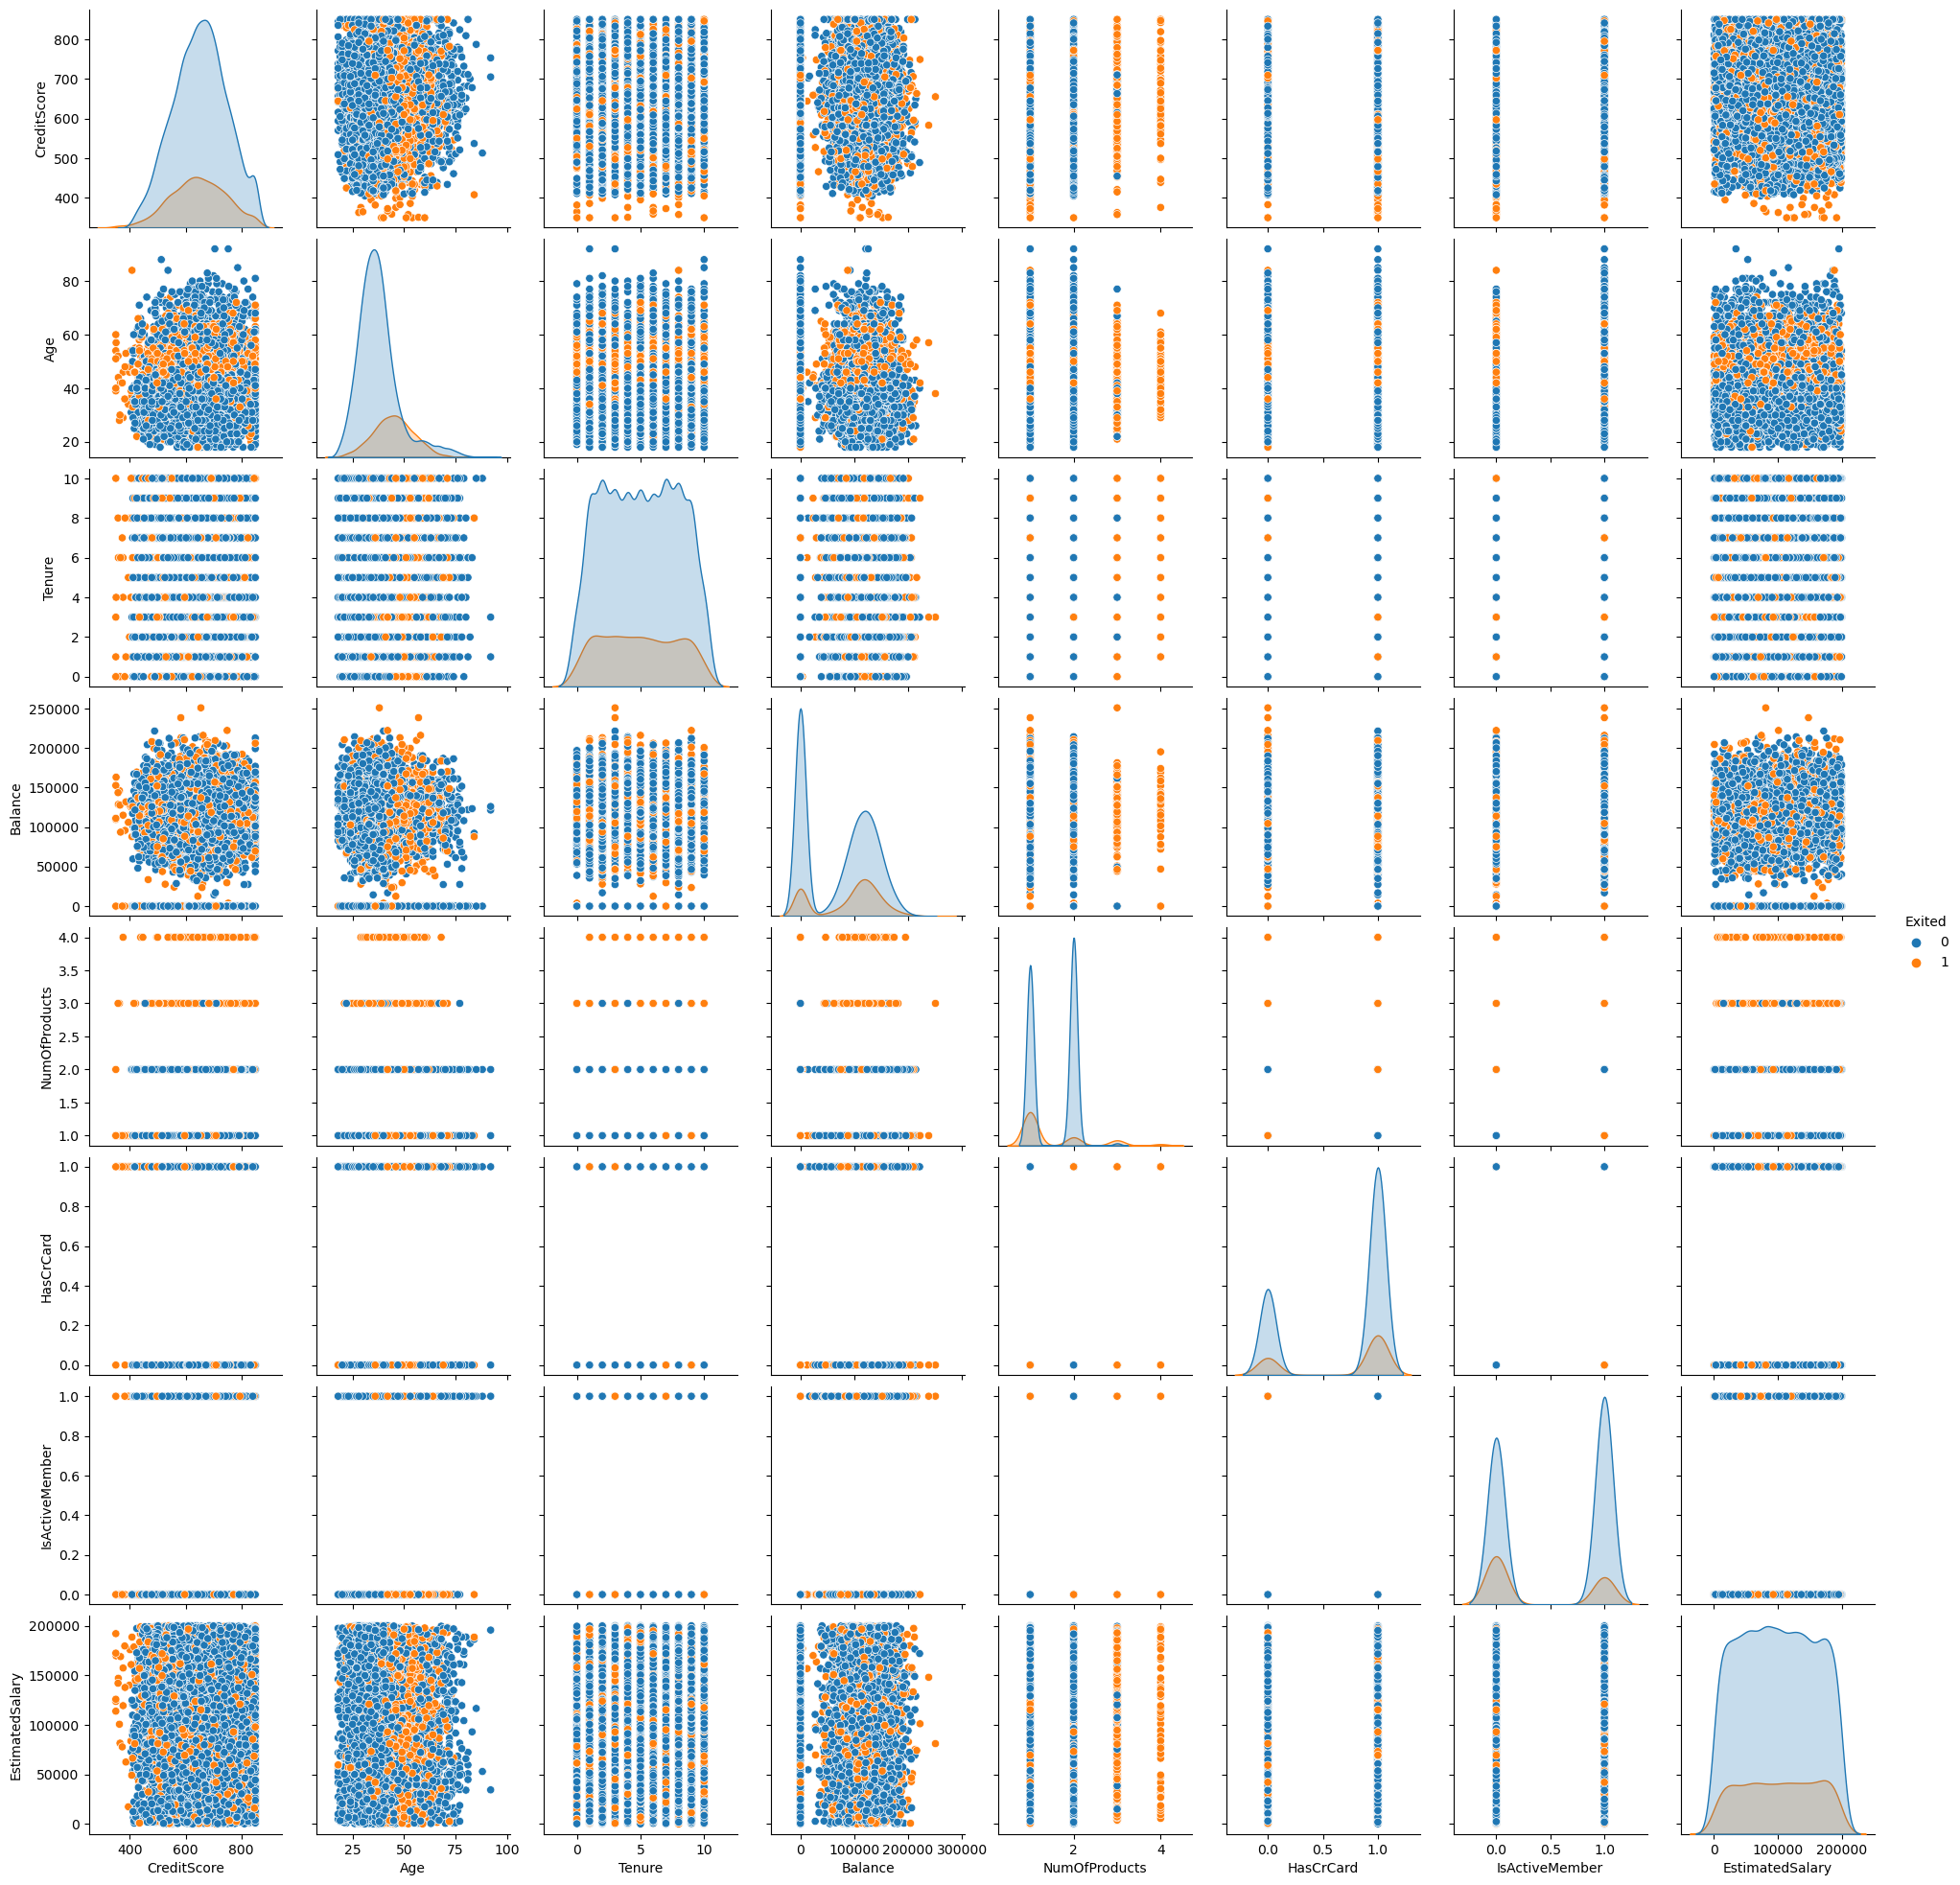

In [356]:
# Create a pairplot to visualize pairwise relationships in the DataFrame.
# The 'hue' parameter is set to 'Exited', which will color the data points based on the 'Exited' column.
sns.pairplot(df, hue = 'Exited')

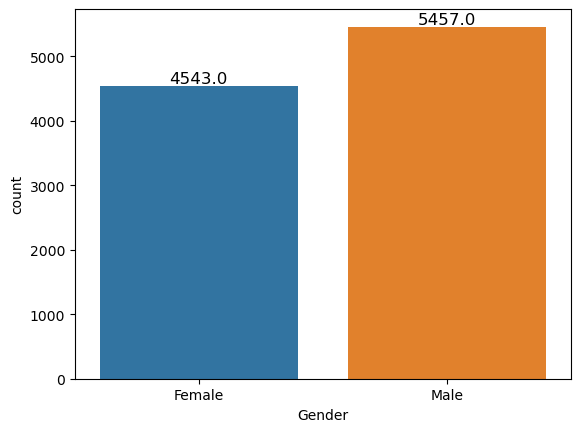

In [357]:
# Ploting Gender as a count plot to see their distribution 
ax = sns.countplot(x=df["Gender"])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

In [358]:
# Count target class
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

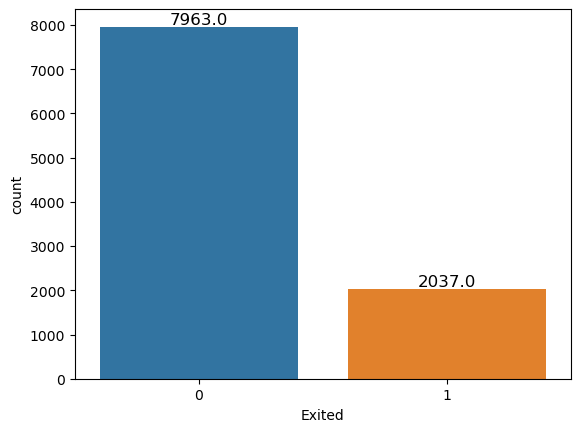

In [359]:
# plotting the target class to see their distribution 
ax = sns.countplot(x=df["Exited"])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

as you can see from the graph the target class is not balanced which actually affects the predection process

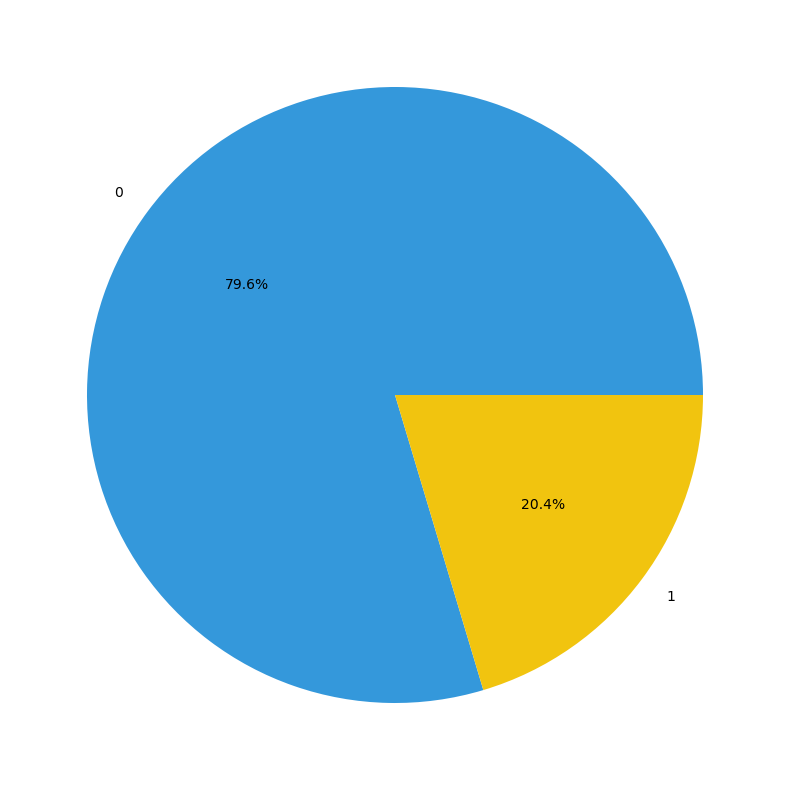

In [360]:
#creates a pie chart to visualize the distribution of the "Exited" column in the DataFrame 'df'
custom_colors = ['#3498DB', '#F1C40F']  # Replace these colors 
df["Exited"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10), colors=custom_colors)
plt.ylabel("")
plt.show()

In [361]:
# Calculate the correlation matrix 
df.corr()

C:\Users\sh-oo\AppData\Local\Temp\ipykernel_28780\3845769469.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CreditScore      -0.005458        0.025651        -0.001384 -0.027094  
Age              -0.011721        0.085472        -0.007201  0.285323  
Tenure            0.022583       -0.028362         0.007784 -0.014001  
Balance          -0.014858       -0.010084         0.012797  0.118533  
NumOfProducts     0.003183        0.009612         0.014204 -0.047820  
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138  
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128  
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097  
Exited           -0.007138       -0.156128         0.012097  1.000000

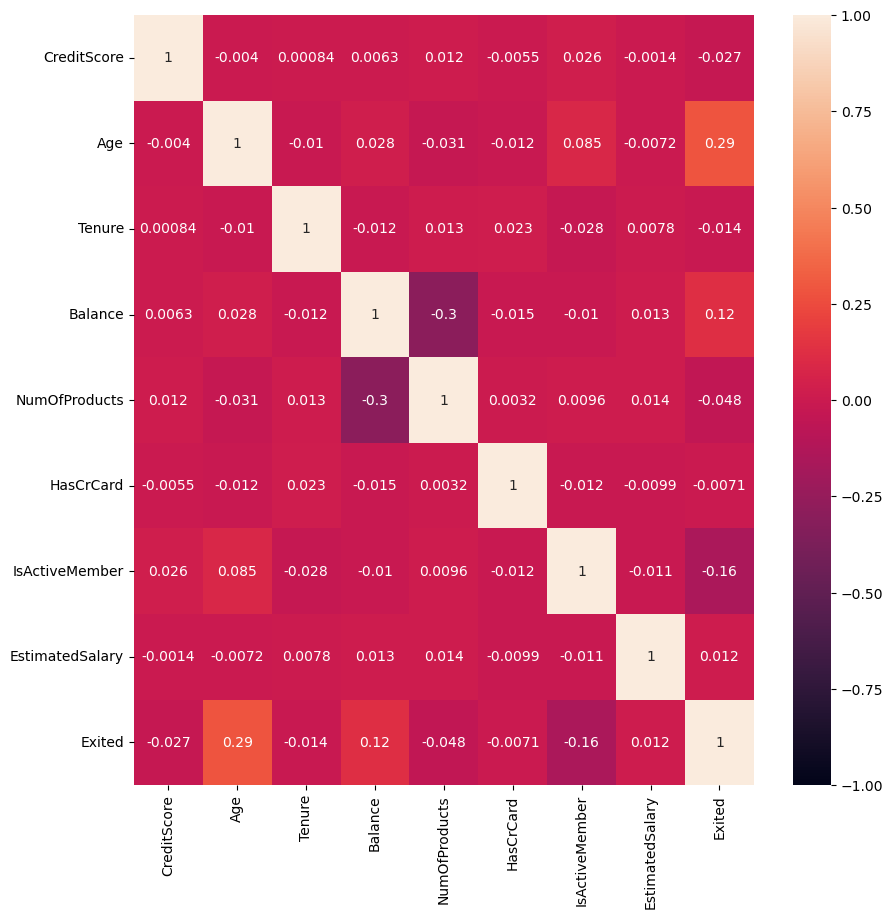

In [362]:
# Generates a heatmap that provides a visual representation 
# of the correlation between numerical features in the 'df' DataFrame.
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1 )
plt.show()

C:\Users\sh-oo\AppData\Local\Temp\ipykernel_28780\4217032522.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Exited"].sort_values().drop("Exited").plot(kind="bar")


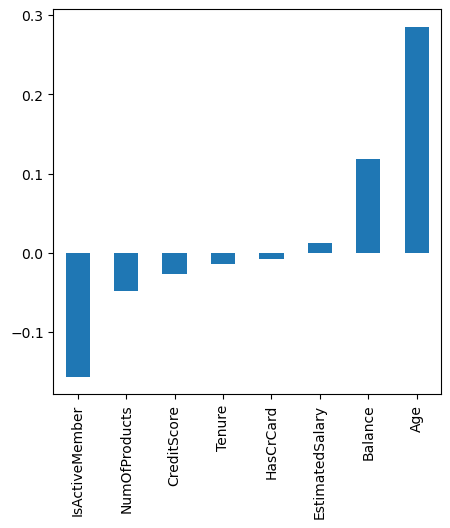

In [363]:
# The code you provided creates a bar plot to visualize the correlations between the "Exited"
# column and other numerical columns in the DataFrame
plt.figure(figsize=(5, 5))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind="bar")
plt.show()

In [364]:
# how many outliers in the dataset?
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outlier_index = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)
outlier_index
# the true value is the number of outlires in the dataset
print(outlier_index.value_counts())

False    7677
True     2323
dtype: int64


C:\Users\sh-oo\AppData\Local\Temp\ipykernel_28780\511981312.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\sh-oo\AppData\Local\Temp\ipykernel_28780\511981312.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
C:\Users\sh-oo\AppData\Local\Temp\ipykernel_28780\511981312.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_index = ((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)


In [365]:
index_numbers = df[outlier_index].index
index_numbers

Int64Index([   0,    2,    5,    7,   16,   22,   30,   35,   41,   43,
            ...
            9947, 9956, 9960, 9962, 9975, 9981, 9982, 9991, 9997, 9998],
           dtype='int64', length=2323)

In [366]:
#df =df.drop(index_numbers)
#df["Exited"].value_counts() ==> 0    7677 only!!  < After dropping outliers so i will not remove it >

In [367]:
#df =df.reset_index(drop=True)
#df

Here I found outliers in the data set but when I was working on the modeling and the evaluation of the modeling 
but when i remove the outliers I found that it will remove class 1 too!!
so I decided I will not remove it !!

In [368]:
# create an interactive boxplot to explore the relationships between different numerical features
# and the "Exited" column in the DataFrame 'df'.
from ipywidgets import interact

def box_m(model):
    sns.boxplot(data = df, x= "Exited", y = model)

interactive_df = df.select_dtypes(include = 'number').columns[
    df.select_dtypes(include = 'number').columns != 'Exited']

interact(box_m, model=interactive_df);


interactive(children=(Dropdown(description='model', options=('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOf…

In [369]:
#This code iterates through each column in the DataFrame 'df' and prints the number of unique values for each column.
for col in df:
    print(f"{col:<30}:", df[col].nunique())

CreditScore                   : 460
Geography                     : 3
Gender                        : 2
Age                           : 70
Tenure                        : 11
Balance                       : 6382
NumOfProducts                 : 4
HasCrCard                     : 2
IsActiveMember                : 2
EstimatedSalary               : 9999
Exited                        : 2


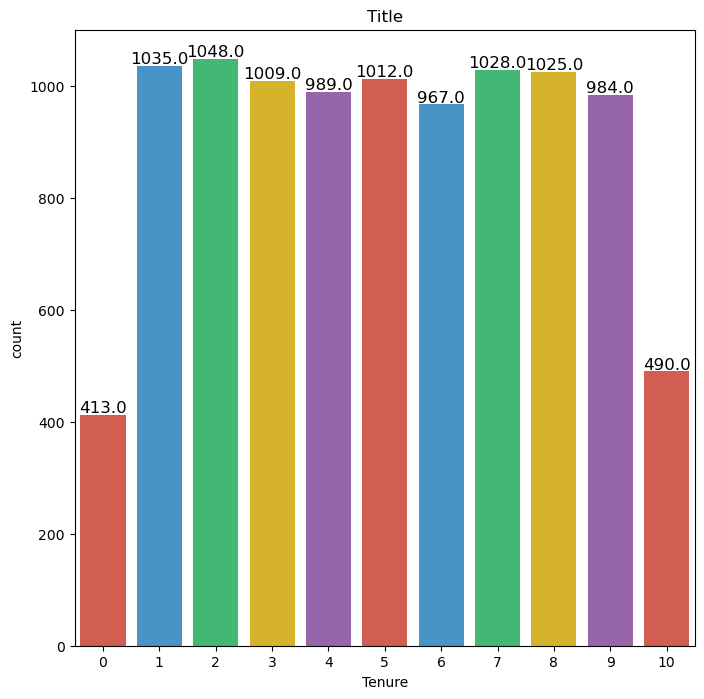

In [370]:
# Creates a countplot using Seaborn to visualize the distribution of the "Tenure" column in the DataFrame 'df'
custom_palette = ['#E74C3C', '#3498DB', '#2ECC71', '#F1C40F', '#9B59B6']
plt.figure(figsize=(8, 8))
x = sns.countplot(x='Tenure', data=df, palette=custom_palette)
plt.title('Title')
plt.xlabel('Tenure')

# Add labels above each bar
for p in x.patches:
    x.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

In [371]:
from sklearn.preprocessing import StandardScaler

In [372]:
#The code performs one-hot encoding on the "Geography" column in the DataFrame 'df'. 
df = pd.get_dummies(df, prefix=['Geo'],columns=['Geography'])

In [373]:
#The code performs one-hot encoding on the "Gender" column in the DataFrame 'df'. 
df = pd.get_dummies(df, prefix=['Gender'],columns=['Gender'])

In [374]:
# Print the dataset 
df

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geo_France  Geo_Germany  \
0                  1        101348.88       1           1            0   
1                  1        112542.58       0           0            0   
2                  0        113931.57       1           1            0   
3                  0         93826.63       0           1            0   
4                  1         79084.10       0           0            0   
...              ...              ...     ...         ...          ...   
9995               0         96270.64       0           1            0   
9996               1        101699.77       0           1            0   
9997               1         42085.58       1           1            0   
9998               0         92888.52       1           0            1   
9999               0         38190.78       0           1            0   

      Geo_Spain  Gender_Female  Gender_Male  
0             0              1            0  
1             1              1            0  
2             0              1            0  
3             0              1            0  
4             1              1            0  
...         ...            ...          ...  
9995          0              0            1  
9996          0              0            1  
9997          0              1            0  
9998          0              0            1  
9999          0              1            0  

[10000 rows x 14 columns]

# Preprocessing of Data
- Train | Test Split, Scalling

In [375]:
# Splitting between the features and the target class
X = df.drop(columns= ["Exited"])
y = df.Exited

In [376]:
# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [377]:
X_train , X_valid, y_train,y_valid =  train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.10, random_state=42
)

In [378]:
# Performing feature scaling on the training and testing sets using the StandardScaler.
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [379]:
print("Training shape : ", X_train.shape)
print("Training target shape   : ", y_train.shape)
print("Test training shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)
print("Training val shape   : ", X_valid.shape)
print("Test val shape   : ", y_valid.shape)

Training shape :  (6300, 13)
Training target shape   :  (6300,)
Test training shape  :  (3000, 13)
Test target shape    :  (3000,)
Training val shape   :  (700, 13)
Test val shape   :  (700,)


# Modelling & Model Performance

## without class_weigth

### Create The Model

The code defines a function roc_auc_plot that generates 
Receiver Operating Characteristic (ROC) curves and calculates

the Area Under the Curve (AUC) for both training and testing sets.

In [380]:
from sklearn.metrics import roc_curve, auc

def roc_auc_plot(y_train, pred_train, y_test, pred_test):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, pred_train)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, pred_test)
    auc_train = auc(fpr_keras, tpr_keras)
    auc_test = auc(fpr_keras_test, tpr_keras_test)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (AUC = {:.3f})'.format(auc_train))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (AUC = {:.3f})'.format(auc_test))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

First, I tried multible of units=20 , units=24, units=26, units=30 , units=60, units=64
and same with second layer and it turns out the 20, 16 does not give me high varience 


In [381]:
#Create a variable to represent the ANN model as an instance
import random
from tensorflow.keras.optimizers import *
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

model = Sequential([
        keras.layers.Dense(units=20,activation="relu", input_dim=X_train.shape[1]), 
        keras.layers.Dense(units=16,activation="relu"),
        keras.layers.Dense(units=8,activation="relu"),
        keras.layers.Dense(units=1,activation="sigmoid") #output layer
     ])

In [382]:
# Compile a neural network model with specified configuration.
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

Here I used 

batch_size=20, epochs=100 , epochs=250,  epochs=500, epochs=750,  epochs=1000 

batch_size=25, epochs=100 , epochs=250,  epochs=500, epochs=750,  epochs=1000 

batch_size=32, epochs=100 , epochs=250,  epochs=500, epochs=750,  epochs=1000 

batch_size=50, epochs=100 , epochs=250,  epochs=500, epochs=750,  epochs=1000 

batch_size=64, epochs=100 , epochs=250,  epochs=500, epochs=750,  epochs=1000

batch_size=120, epochs=100 , epochs=250,  epochs=500, epochs=750,  epochs=1000 


and i decided to go with  batch_size=64 epochs=500  because the veriece of them was less than the list above - some give me overfetting problem!!


In [383]:
modelANN = model.fit(
    x=X_train, y=y_train, validation_data=(X_valid,y_valid), batch_size=50, epochs=250, verbose=1)

Epoch 1/250
126/126 [==============================] - 1s 2ms/step - loss: 0.7264 - accuracy: 0.5224 - val_loss: 0.6524 - val_accuracy: 0.8029
Epoch 2/250
126/126 [==============================] - 0s 1ms/step - loss: 0.5838 - accuracy: 0.7987 - val_loss: 0.4902 - val_accuracy: 0.7986
Epoch 3/250
126/126 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.8059 - val_loss: 0.4185 - val_accuracy: 0.8186
Epoch 4/250
126/126 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8206 - val_loss: 0.3854 - val_accuracy: 0.8371
Epoch 5/250
126/126 [==============================] - 0s 1ms/step - loss: 0.3887 - accuracy: 0.8379 - val_loss: 0.3647 - val_accuracy: 0.8500
Epoch 6/250
126/126 [==============================] - 0s 1ms/step - loss: 0.3710 - accuracy: 0.8489 - val_loss: 0.3567 - val_accuracy: 0.8586
Epoch 7/250
126/126 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.8508 - val_loss: 0.3531 - val_accuracy: 0.8557

Epoch 58/250
126/126 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8697 - val_loss: 0.3677 - val_accuracy: 0.8529
Epoch 59/250
126/126 [==============================] - 0s 986us/step - loss: 0.3148 - accuracy: 0.8665 - val_loss: 0.3683 - val_accuracy: 0.8443
Epoch 60/250
126/126 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.8698 - val_loss: 0.3702 - val_accuracy: 0.8457
Epoch 61/250
126/126 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8675 - val_loss: 0.3670 - val_accuracy: 0.8514
Epoch 62/250
126/126 [==============================] - 0s 1ms/step - loss: 0.3141 - accuracy: 0.8689 - val_loss: 0.3678 - val_accuracy: 0.8514
Epoch 63/250
126/126 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8678 - val_loss: 0.3674 - val_accuracy: 0.8514
Epoch 64/250
126/126 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8675 - val_loss: 0.3711 - val_accurac

126/126 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.8737 - val_loss: 0.3842 - val_accuracy: 0.8343
Epoch 115/250
126/126 [==============================] - 0s 1ms/step - loss: 0.2999 - accuracy: 0.8752 - val_loss: 0.3782 - val_accuracy: 0.8400
Epoch 116/250
126/126 [==============================] - 0s 1ms/step - loss: 0.2992 - accuracy: 0.8735 - val_loss: 0.3800 - val_accuracy: 0.8329
Epoch 117/250
126/126 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.8746 - val_loss: 0.3820 - val_accuracy: 0.8343
Epoch 118/250
126/126 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8751 - val_loss: 0.3816 - val_accuracy: 0.8386
Epoch 119/250
126/126 [==============================] - 0s 1ms/step - loss: 0.2989 - accuracy: 0.8744 - val_loss: 0.3843 - val_accuracy: 0.8314
Epoch 120/250
126/126 [==============================] - 0s 1ms/step - loss: 0.2989 - accuracy: 0.8746 - val_loss: 0.3860 - val_accuracy: 0.8300

126/126 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.8778 - val_loss: 0.3892 - val_accuracy: 0.8271
Epoch 171/250
126/126 [==============================] - 0s 1ms/step - loss: 0.2904 - accuracy: 0.8792 - val_loss: 0.3876 - val_accuracy: 0.8329
Epoch 172/250
126/126 [==============================] - 0s 986us/step - loss: 0.2906 - accuracy: 0.8775 - val_loss: 0.3909 - val_accuracy: 0.8343
Epoch 173/250
126/126 [==============================] - 0s 1ms/step - loss: 0.2893 - accuracy: 0.8789 - val_loss: 0.3877 - val_accuracy: 0.8357
Epoch 174/250
126/126 [==============================] - 0s 977us/step - loss: 0.2907 - accuracy: 0.8781 - val_loss: 0.3906 - val_accuracy: 0.8329
Epoch 175/250
126/126 [==============================] - 0s 1ms/step - loss: 0.2905 - accuracy: 0.8792 - val_loss: 0.3907 - val_accuracy: 0.8314
Epoch 176/250
126/126 [==============================] - 0s 989us/step - loss: 0.2906 - accuracy: 0.8787 - val_loss: 0.3911 - val_accuracy: 

126/126 [==============================] - 0s 1ms/step - loss: 0.2824 - accuracy: 0.8822 - val_loss: 0.3978 - val_accuracy: 0.8343
Epoch 227/250
126/126 [==============================] - 0s 979us/step - loss: 0.2819 - accuracy: 0.8813 - val_loss: 0.4018 - val_accuracy: 0.8443
Epoch 228/250
126/126 [==============================] - 0s 1ms/step - loss: 0.2822 - accuracy: 0.8840 - val_loss: 0.3978 - val_accuracy: 0.8357
Epoch 229/250
126/126 [==============================] - 0s 988us/step - loss: 0.2822 - accuracy: 0.8840 - val_loss: 0.4052 - val_accuracy: 0.8343
Epoch 230/250
126/126 [==============================] - 0s 1ms/step - loss: 0.2814 - accuracy: 0.8816 - val_loss: 0.4051 - val_accuracy: 0.8286
Epoch 231/250
126/126 [==============================] - 0s 962us/step - loss: 0.2814 - accuracy: 0.8829 - val_loss: 0.4136 - val_accuracy: 0.8186
Epoch 232/250
126/126 [==============================] - 0s 984us/step - loss: 0.2822 - accuracy: 0.8832 - val_loss: 0.4064 - val_accuracy

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [384]:
# Display a summary of the architecture and parameters of a neural network model.
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 20)                280       
                                                                 
 dense_153 (Dense)           (None, 16)                336       
                                                                 
 dense_154 (Dense)           (None, 8)                 136       
                                                                 
 dense_155 (Dense)           (None, 1)                 9         
                                                                 
Total params: 761 (2.97 KB)
Trainable params: 761 (2.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [385]:
# Extracts and stores the training history of a neural network model.
modelhistory=model.history.history
modelhistory

{'loss': [0.7264071702957153,
  0.583781361579895,
  0.45808422565460205,
  0.41589686274528503,
  0.38868504762649536,
  0.37104332447052,
  0.36309805512428284,
  0.357334166765213,
  0.353566437959671,
  0.3506696820259094,
  0.3476395010948181,
  0.3469952940940857,
  0.3452395796775818,
  0.34487390518188477,
  0.3427739143371582,
  0.3411027789115906,
  0.33925336599349976,
  0.33838769793510437,
  0.3372395932674408,
  0.3357832133769989,
  0.3356289565563202,
  0.33435627818107605,
  0.33409804105758667,
  0.3330950140953064,
  0.3322814106941223,
  0.3311510682106018,
  0.33046963810920715,
  0.33024486899375916,
  0.32917189598083496,
  0.32839980721473694,
  0.32858991622924805,
  0.3271147310733795,
  0.3269376754760742,
  0.3253127336502075,
  0.32531067728996277,
  0.32450950145721436,
  0.32335925102233887,
  0.32351675629615784,
  0.32314756512641907,
  0.32281413674354553,
  0.3215174078941345,
  0.32164502143859863,
  0.3216637670993805,
  0.31935444474220276,
  0.320

In [386]:
# Displays a confusion matrix and a classification report for the training set 
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

197/197 [==============================] - 0s 679us/step
[[4892  125]
 [ 580  703]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5017
           1       0.85      0.55      0.67      1283

    accuracy                           0.89      6300
   macro avg       0.87      0.76      0.80      6300
weighted avg       0.88      0.89      0.88      6300



In [387]:
# Displays a confusion matrix and a classification report for the test set 
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 612us/step
[[2259  130]
 [ 324  287]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2389
           1       0.69      0.47      0.56       611

    accuracy                           0.85      3000
   macro avg       0.78      0.71      0.73      3000
weighted avg       0.84      0.85      0.84      3000



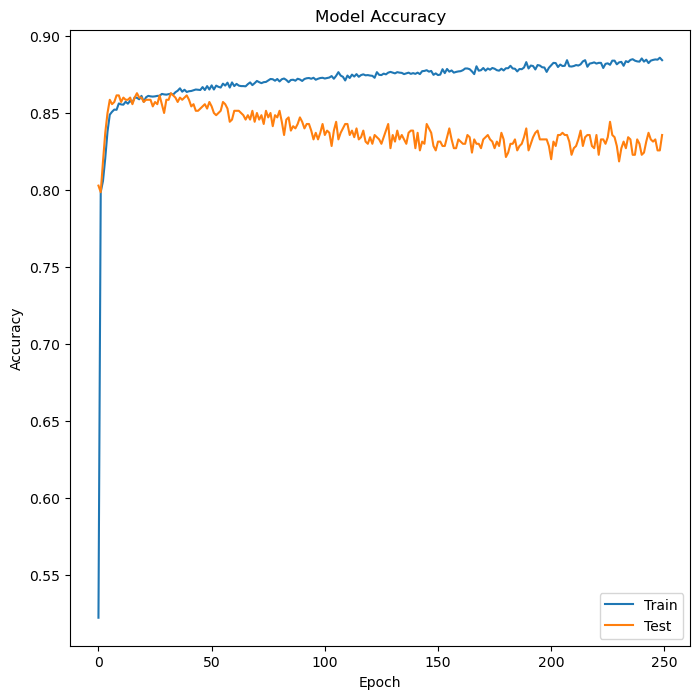

In [388]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(modelANN.history['accuracy'])
plt.plot(modelANN.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [389]:
# Calculates the Receiver Operating Characteristic Area Under the Curve (ROC AUC) score 
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7076528469615581

In [390]:
# Display Acuuracy and loss of the model
loss,acc = model.evaluate(X_test,y_test)
print("Test Accuarcy:",acc)
print("Test Loss:",loss)

94/94 [==============================] - 0s 743us/step - loss: 0.3809 - accuracy: 0.8487
Test Accuarcy: 0.8486666679382324
Test Loss: 0.3808830678462982


In [391]:
loss_df = pd.DataFrame(modelhistory)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.726407  0.522381  0.652372      0.802857
1  0.583781  0.798730  0.490203      0.798571
2  0.458084  0.805873  0.418461      0.818571
3  0.415897  0.820635  0.385391      0.837143
4  0.388685  0.837937  0.364726      0.850000

In [392]:
loss_df

loss  accuracy  val_loss  val_accuracy
0    0.726407  0.522381  0.652372      0.802857
1    0.583781  0.798730  0.490203      0.798571
2    0.458084  0.805873  0.418461      0.818571
3    0.415897  0.820635  0.385391      0.837143
4    0.388685  0.837937  0.364726      0.850000
..        ...       ...       ...           ...
245  0.279838  0.884444  0.410616      0.831429
246  0.278288  0.884762  0.409235      0.832857
247  0.278614  0.884603  0.410035      0.825714
248  0.278997  0.885873  0.412011      0.825714
249  0.277978  0.884286  0.407076      0.835714

[250 rows x 4 columns]

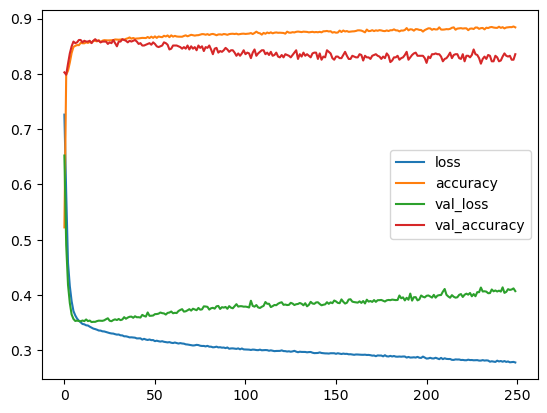

In [393]:
loss_df.plot()
plt.show()

In [394]:
roc_auc_score(y_test, y_pred)

0.7076528469615581

In [395]:
y_pred = model.predict(X_test)

94/94 [==============================] - 0s 606us/step


In [396]:
y_train_pred = model.predict(X_train)

197/197 [==============================] - 0s 600us/step


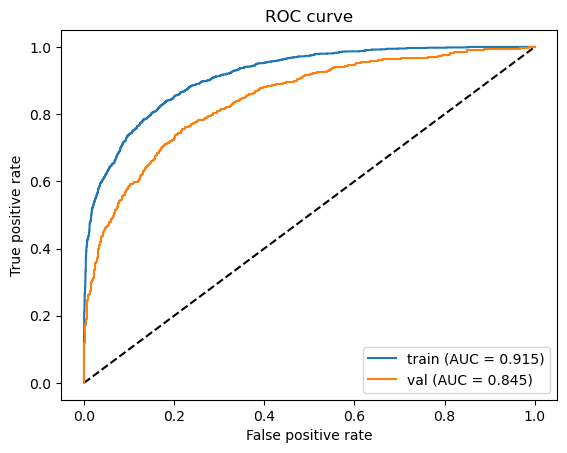

In [397]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [398]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

In [399]:
class_weights

{0: 0.6278652581223839, 1: 2.4551831644583006}

In [400]:
#Create a variable to represent the ANN model as an instance
model = Sequential([
        keras.layers.Dense(units=20,activation="relu", input_dim=X_train.shape[1]), 
        keras.layers.Dense(units=16,activation="relu"),
        keras.layers.Dense(units=8,activation="relu"),
        keras.layers.Dense(units=1,activation="sigmoid") #output layer
])   

In [401]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [402]:
modelwithW=model.fit(x=X_train, y=y_train, validation_data=(X_valid,y_valid), batch_size=64, epochs=250, verbose=1)

Epoch 1/250
99/99 [==============================] - 1s 2ms/step - loss: 0.6281 - accuracy: 0.6789 - val_loss: 0.5151 - val_accuracy: 0.7957
Epoch 2/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7967 - val_loss: 0.4423 - val_accuracy: 0.8029
Epoch 3/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8121 - val_loss: 0.3972 - val_accuracy: 0.8200
Epoch 4/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8324 - val_loss: 0.3759 - val_accuracy: 0.8414
Epoch 5/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8411 - val_loss: 0.3592 - val_accuracy: 0.8486
Epoch 6/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3680 - accuracy: 0.8433 - val_loss: 0.3531 - val_accuracy: 0.8543
Epoch 7/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8462 - val_loss: 0.3498 - val_accuracy: 0.8543
Epoch 8/250
9

Epoch 59/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8676 - val_loss: 0.3396 - val_accuracy: 0.8614
Epoch 60/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3137 - accuracy: 0.8675 - val_loss: 0.3407 - val_accuracy: 0.8586
Epoch 61/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8657 - val_loss: 0.3407 - val_accuracy: 0.8643
Epoch 62/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8660 - val_loss: 0.3395 - val_accuracy: 0.8629
Epoch 63/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3129 - accuracy: 0.8668 - val_loss: 0.3383 - val_accuracy: 0.8614
Epoch 64/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3120 - accuracy: 0.8656 - val_loss: 0.3428 - val_accuracy: 0.8586
Epoch 65/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.8663 - val_loss: 0.3414 - val_accuracy: 0.8586
Epoch 

99/99 [==============================] - 0s 1ms/step - loss: 0.3005 - accuracy: 0.8749 - val_loss: 0.3493 - val_accuracy: 0.8643
Epoch 117/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2995 - accuracy: 0.8751 - val_loss: 0.3563 - val_accuracy: 0.8614
Epoch 118/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.8767 - val_loss: 0.3512 - val_accuracy: 0.8586
Epoch 119/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2993 - accuracy: 0.8759 - val_loss: 0.3557 - val_accuracy: 0.8671
Epoch 120/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2987 - accuracy: 0.8759 - val_loss: 0.3573 - val_accuracy: 0.8629
Epoch 121/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8733 - val_loss: 0.3571 - val_accuracy: 0.8586
Epoch 122/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.8751 - val_loss: 0.3546 - val_accuracy: 0.8586
Epoch 123/250

99/99 [==============================] - 0s 1ms/step - loss: 0.2895 - accuracy: 0.8816 - val_loss: 0.3678 - val_accuracy: 0.8629
Epoch 174/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.8811 - val_loss: 0.3686 - val_accuracy: 0.8614
Epoch 175/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2896 - accuracy: 0.8813 - val_loss: 0.3718 - val_accuracy: 0.8600
Epoch 176/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.8813 - val_loss: 0.3757 - val_accuracy: 0.8629
Epoch 177/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2888 - accuracy: 0.8821 - val_loss: 0.3763 - val_accuracy: 0.8629
Epoch 178/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.8811 - val_loss: 0.3732 - val_accuracy: 0.8614
Epoch 179/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2892 - accuracy: 0.8798 - val_loss: 0.3716 - val_accuracy: 0.8643
Epoch 180/250

99/99 [==============================] - 0s 1ms/step - loss: 0.2801 - accuracy: 0.8837 - val_loss: 0.3775 - val_accuracy: 0.8643
Epoch 231/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2794 - accuracy: 0.8838 - val_loss: 0.3799 - val_accuracy: 0.8571
Epoch 232/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2803 - accuracy: 0.8862 - val_loss: 0.3758 - val_accuracy: 0.8629
Epoch 233/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.8844 - val_loss: 0.3811 - val_accuracy: 0.8600
Epoch 234/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2803 - accuracy: 0.8832 - val_loss: 0.3776 - val_accuracy: 0.8614
Epoch 235/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2804 - accuracy: 0.8835 - val_loss: 0.3760 - val_accuracy: 0.8643
Epoch 236/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2781 - accuracy: 0.8846 - val_loss: 0.3743 - val_accuracy: 0.8600
Epoch 237/250

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [403]:
modelhistory=model.history.history

In [404]:
loss,acc = model.evaluate(X_test,y_test)
print("Test Accuarcy:",acc)
print("Tets Loss:",loss)

94/94 [==============================] - 0s 677us/step - loss: 0.3847 - accuracy: 0.8567
Test Accuarcy: 0.8566666841506958
Tets Loss: 0.3846605122089386


In [405]:
loss_df = pd.DataFrame(modelhistory)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.628150  0.678889  0.515082      0.795714
1  0.478107  0.796667  0.442252      0.802857
2  0.426451  0.812064  0.397172      0.820000
3  0.397660  0.832381  0.375905      0.841429
4  0.379419  0.841111  0.359238      0.848571

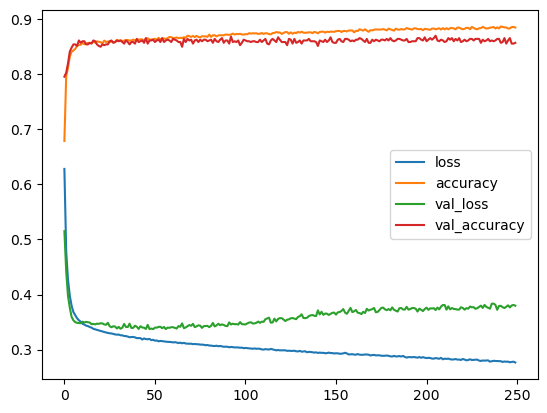

In [406]:
loss_df.plot()
plt.show()

In [407]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

197/197 [==============================] - 0s 658us/step
[[4891  126]
 [ 575  708]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5017
           1       0.85      0.55      0.67      1283

    accuracy                           0.89      6300
   macro avg       0.87      0.76      0.80      6300
weighted avg       0.89      0.89      0.88      6300



In [408]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 601us/step
[[2277  112]
 [ 318  293]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2389
           1       0.72      0.48      0.58       611

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



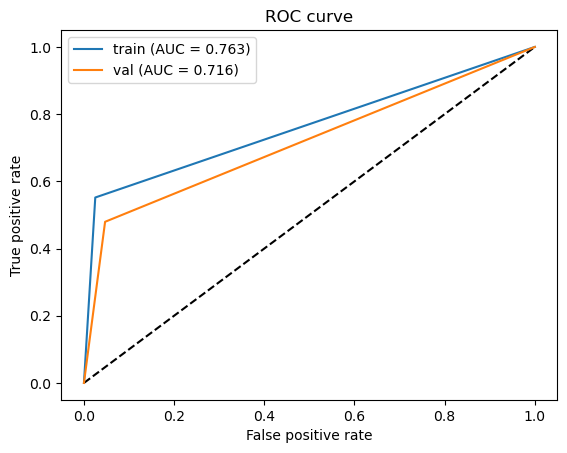

In [409]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

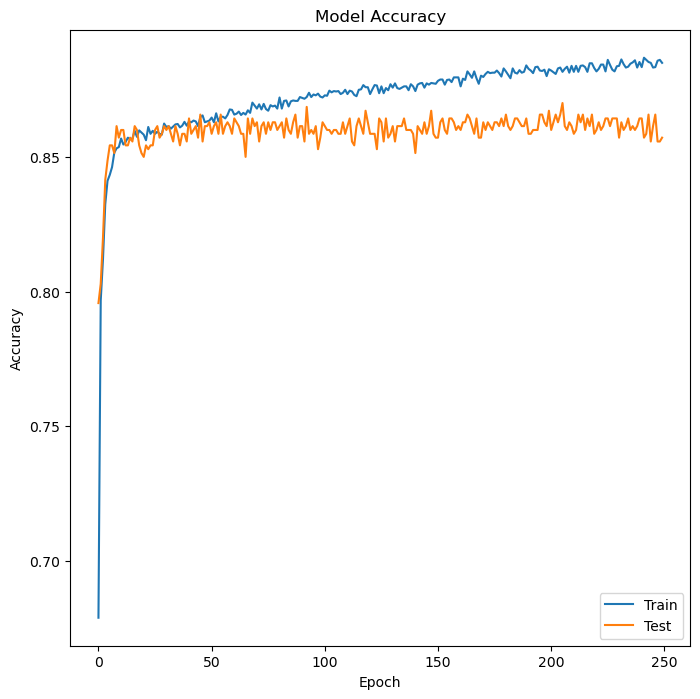

In [410]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(modelwithW.history['accuracy'])
plt.plot(modelwithW.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

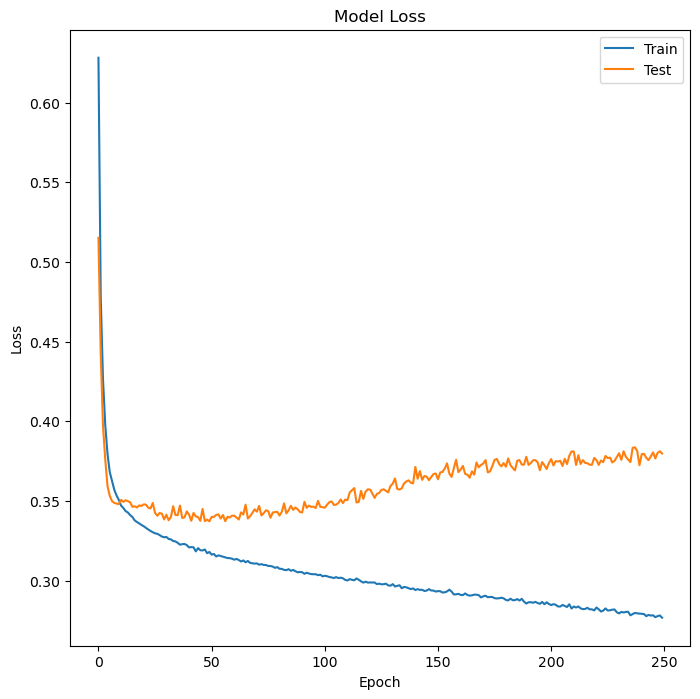

In [411]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(modelwithW.history['loss'])
plt.plot(modelwithW.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [412]:
from tensorflow.keras.optimizers import Adam
model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [413]:
modelLr=model.fit(x = X_train, y = y_train, validation_data=(X_valid,y_valid), batch_size = 64, epochs = 250, class_weight=class_weights)

Epoch 1/250
99/99 [==============================] - 1s 2ms/step - loss: 0.6105 - accuracy: 0.6532 - val_loss: 0.5694 - val_accuracy: 0.7129
Epoch 2/250
99/99 [==============================] - 0s 1ms/step - loss: 0.5472 - accuracy: 0.7129 - val_loss: 0.5303 - val_accuracy: 0.7357
Epoch 3/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4961 - accuracy: 0.7546 - val_loss: 0.4807 - val_accuracy: 0.7657
Epoch 4/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7740 - val_loss: 0.4582 - val_accuracy: 0.7786
Epoch 5/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 0.7843 - val_loss: 0.4683 - val_accuracy: 0.7600
Epoch 6/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.7802 - val_loss: 0.4629 - val_accuracy: 0.7671
Epoch 7/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4610 - accuracy: 0.7783 - val_loss: 0.4359 - val_accuracy: 0.7843
Epoch 8/250
9

Epoch 59/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3608 - accuracy: 0.8124 - val_loss: 0.6007 - val_accuracy: 0.7000
Epoch 60/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3707 - accuracy: 0.8003 - val_loss: 0.5396 - val_accuracy: 0.7214
Epoch 61/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8100 - val_loss: 0.5752 - val_accuracy: 0.7300
Epoch 62/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3645 - accuracy: 0.8111 - val_loss: 0.5899 - val_accuracy: 0.7171
Epoch 63/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3634 - accuracy: 0.8084 - val_loss: 0.5401 - val_accuracy: 0.7371
Epoch 64/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8154 - val_loss: 0.5772 - val_accuracy: 0.7157
Epoch 65/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8079 - val_loss: 0.6014 - val_accuracy: 0.7071
Epoch 

99/99 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8271 - val_loss: 0.6594 - val_accuracy: 0.7243
Epoch 117/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3236 - accuracy: 0.8310 - val_loss: 0.6882 - val_accuracy: 0.6886
Epoch 118/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3240 - accuracy: 0.8222 - val_loss: 0.6554 - val_accuracy: 0.7257
Epoch 119/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.8306 - val_loss: 0.6696 - val_accuracy: 0.7200
Epoch 120/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3260 - accuracy: 0.8251 - val_loss: 0.6770 - val_accuracy: 0.7157
Epoch 121/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8271 - val_loss: 0.6690 - val_accuracy: 0.7214
Epoch 122/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.8329 - val_loss: 0.6972 - val_accuracy: 0.7029
Epoch 123/250

99/99 [==============================] - 0s 1ms/step - loss: 0.3052 - accuracy: 0.8386 - val_loss: 0.6997 - val_accuracy: 0.7514
Epoch 174/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3072 - accuracy: 0.8395 - val_loss: 0.7323 - val_accuracy: 0.7386
Epoch 175/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3034 - accuracy: 0.8419 - val_loss: 0.7581 - val_accuracy: 0.7200
Epoch 176/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3076 - accuracy: 0.8387 - val_loss: 0.7142 - val_accuracy: 0.7343
Epoch 177/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3068 - accuracy: 0.8389 - val_loss: 0.7233 - val_accuracy: 0.7229
Epoch 178/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3078 - accuracy: 0.8386 - val_loss: 0.6946 - val_accuracy: 0.7186
Epoch 179/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3031 - accuracy: 0.8389 - val_loss: 0.7036 - val_accuracy: 0.7457
Epoch 180/250

99/99 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.8444 - val_loss: 0.7629 - val_accuracy: 0.7229
Epoch 231/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2898 - accuracy: 0.8529 - val_loss: 0.7916 - val_accuracy: 0.7200
Epoch 232/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2967 - accuracy: 0.8419 - val_loss: 0.7530 - val_accuracy: 0.7257
Epoch 233/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2907 - accuracy: 0.8494 - val_loss: 0.7859 - val_accuracy: 0.7229
Epoch 234/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2944 - accuracy: 0.8483 - val_loss: 0.7536 - val_accuracy: 0.7229
Epoch 235/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2875 - accuracy: 0.8492 - val_loss: 0.7846 - val_accuracy: 0.7343
Epoch 236/250
99/99 [==============================] - 0s 1ms/step - loss: 0.2899 - accuracy: 0.8487 - val_loss: 0.7818 - val_accuracy: 0.7329
Epoch 237/250

In [414]:
modelhistory=model.history.history
loss_df = pd.DataFrame(modelhistory)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.610465  0.653175  0.569438      0.712857
1  0.547162  0.712857  0.530316      0.735714
2  0.496108  0.754603  0.480734      0.765714
3  0.477424  0.773968  0.458190      0.778571
4  0.469825  0.784286  0.468288      0.760000

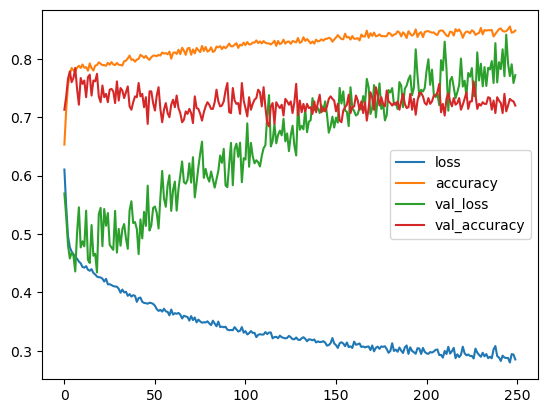

In [415]:
loss_df.plot()
plt.show()

In [416]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.6690374612808228
accuracy:  0.7620000243186951


In [417]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

197/197 [==============================] - 0s 664us/step
[[4204  813]
 [  94 1189]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      5017
           1       0.59      0.93      0.72      1283

    accuracy                           0.86      6300
   macro avg       0.79      0.88      0.81      6300
weighted avg       0.90      0.86      0.87      6300



In [418]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 623us/step
[[1869  520]
 [ 194  417]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      2389
           1       0.45      0.68      0.54       611

    accuracy                           0.76      3000
   macro avg       0.68      0.73      0.69      3000
weighted avg       0.81      0.76      0.78      3000



In [419]:
roc_auc_score(y_test, y_pred)

0.7324117151784741

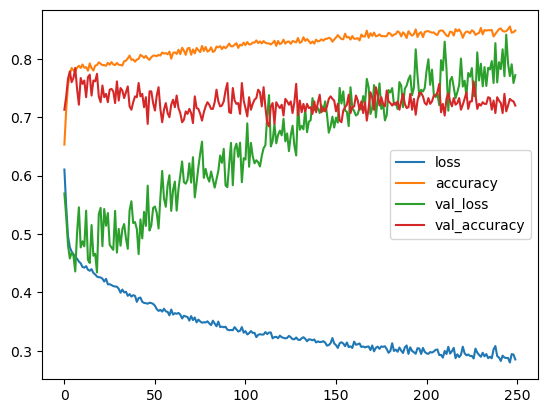

In [420]:
loss_df = pd.DataFrame(modelhistory)
loss_df.plot()
plt.show()

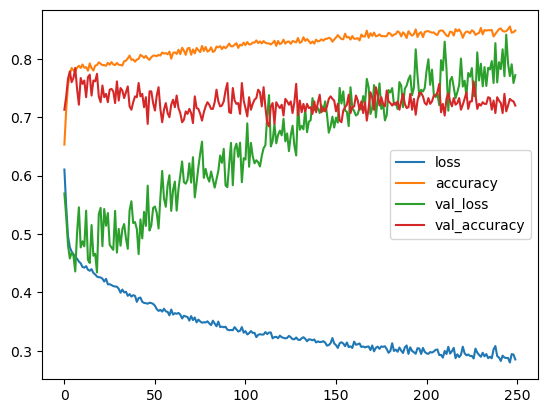

In [421]:
loss_df.plot()
plt.show()

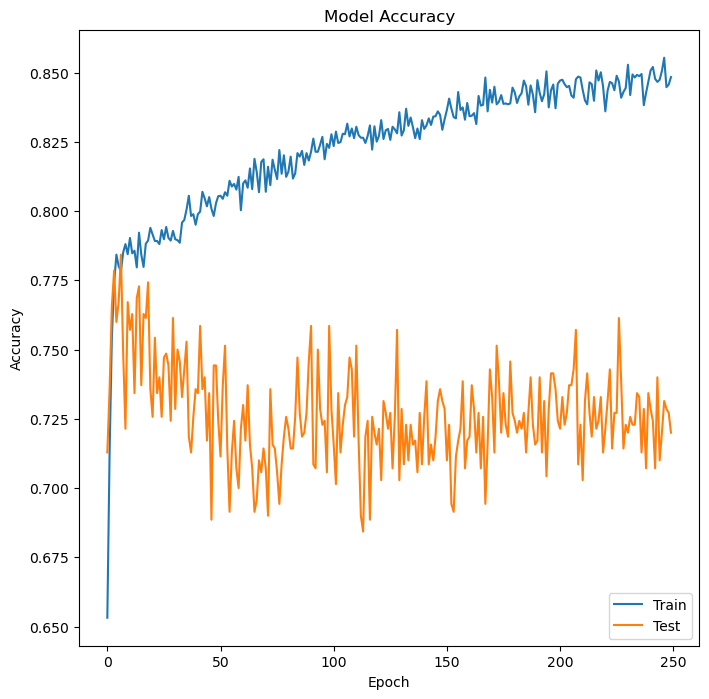

In [422]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(modelLr.history['accuracy'])
plt.plot(modelLr.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

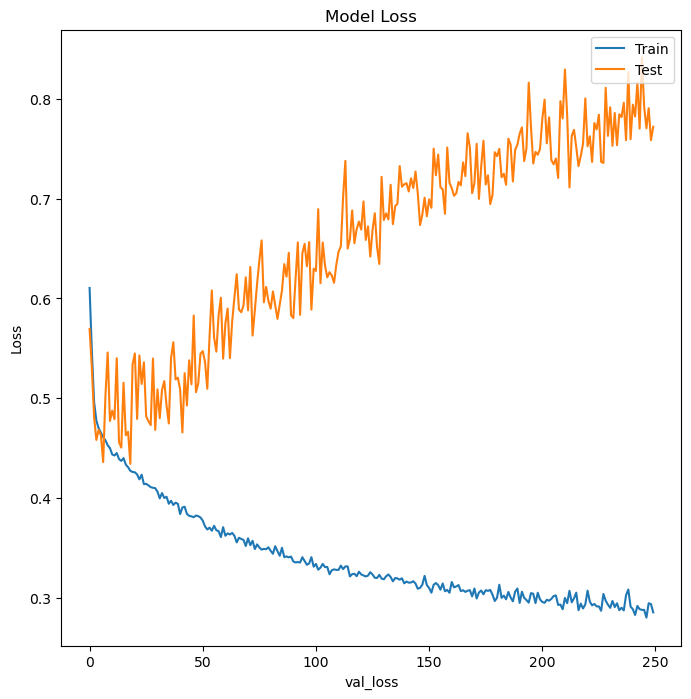

In [423]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(modelLr.history['loss'])
plt.plot(modelLr.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('val_loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

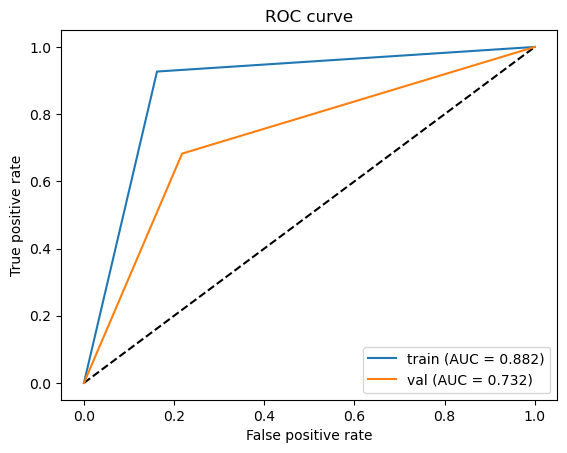

In [424]:
 roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

### Add Dropout Layer

In [425]:
from tensorflow.keras.layers import Dropout

In [426]:
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.004)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [427]:
modelDo=model.fit(x = X_train, y = y_train, validation_data=(X_valid,y_valid), batch_size = 64, epochs = 250, class_weight=class_weights)

Epoch 1/250
99/99 [==============================] - 1s 2ms/step - loss: 0.6749 - accuracy: 0.5811 - val_loss: 0.6252 - val_accuracy: 0.7143
Epoch 2/250
99/99 [==============================] - 0s 1ms/step - loss: 0.6334 - accuracy: 0.6530 - val_loss: 0.5707 - val_accuracy: 0.7529
Epoch 3/250
99/99 [==============================] - 0s 1ms/step - loss: 0.6120 - accuracy: 0.6757 - val_loss: 0.5577 - val_accuracy: 0.7500
Epoch 4/250
99/99 [==============================] - 0s 1ms/step - loss: 0.5924 - accuracy: 0.7170 - val_loss: 0.6037 - val_accuracy: 0.7029
Epoch 5/250
99/99 [==============================] - 0s 1ms/step - loss: 0.5723 - accuracy: 0.7214 - val_loss: 0.5238 - val_accuracy: 0.7400
Epoch 6/250
99/99 [==============================] - 0s 1ms/step - loss: 0.5686 - accuracy: 0.7217 - val_loss: 0.5223 - val_accuracy: 0.7443
Epoch 7/250
99/99 [==============================] - 0s 1ms/step - loss: 0.5448 - accuracy: 0.7483 - val_loss: 0.4804 - val_accuracy: 0.7629
Epoch 8/250
9

Epoch 59/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4931 - accuracy: 0.7746 - val_loss: 0.4874 - val_accuracy: 0.7514
Epoch 60/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.7805 - val_loss: 0.4727 - val_accuracy: 0.7543
Epoch 61/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4978 - accuracy: 0.7833 - val_loss: 0.4828 - val_accuracy: 0.7557
Epoch 62/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.7810 - val_loss: 0.4459 - val_accuracy: 0.7800
Epoch 63/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.7814 - val_loss: 0.4707 - val_accuracy: 0.7486
Epoch 64/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4962 - accuracy: 0.7687 - val_loss: 0.4942 - val_accuracy: 0.7414
Epoch 65/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7825 - val_loss: 0.4763 - val_accuracy: 0.7486
Epoch 

99/99 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7971 - val_loss: 0.4432 - val_accuracy: 0.7686
Epoch 117/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4906 - accuracy: 0.7884 - val_loss: 0.4836 - val_accuracy: 0.7571
Epoch 118/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.7886 - val_loss: 0.4528 - val_accuracy: 0.7586
Epoch 119/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7854 - val_loss: 0.4778 - val_accuracy: 0.7529
Epoch 120/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7838 - val_loss: 0.4764 - val_accuracy: 0.7586
Epoch 121/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.7856 - val_loss: 0.4739 - val_accuracy: 0.7543
Epoch 122/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.7798 - val_loss: 0.4655 - val_accuracy: 0.7514
Epoch 123/250

99/99 [==============================] - 0s 1ms/step - loss: 0.4840 - accuracy: 0.7835 - val_loss: 0.4612 - val_accuracy: 0.7700
Epoch 174/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4864 - accuracy: 0.7878 - val_loss: 0.4502 - val_accuracy: 0.7657
Epoch 175/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.7898 - val_loss: 0.4617 - val_accuracy: 0.7643
Epoch 176/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.7898 - val_loss: 0.4716 - val_accuracy: 0.7686
Epoch 177/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7898 - val_loss: 0.4364 - val_accuracy: 0.7814
Epoch 178/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4813 - accuracy: 0.7916 - val_loss: 0.4648 - val_accuracy: 0.7714
Epoch 179/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4832 - accuracy: 0.7881 - val_loss: 0.4740 - val_accuracy: 0.7714
Epoch 180/250

99/99 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.7935 - val_loss: 0.4713 - val_accuracy: 0.7729
Epoch 231/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7848 - val_loss: 0.4754 - val_accuracy: 0.7786
Epoch 232/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4859 - accuracy: 0.7940 - val_loss: 0.4821 - val_accuracy: 0.7757
Epoch 233/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4815 - accuracy: 0.7949 - val_loss: 0.4612 - val_accuracy: 0.7800
Epoch 234/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7921 - val_loss: 0.4757 - val_accuracy: 0.7771
Epoch 235/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4828 - accuracy: 0.7878 - val_loss: 0.4912 - val_accuracy: 0.7729
Epoch 236/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7965 - val_loss: 0.4662 - val_accuracy: 0.7900
Epoch 237/250

In [428]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.674890  0.581111  0.625203      0.714286
1  0.633411  0.653016  0.570671      0.752857
2  0.611977  0.675714  0.557709      0.750000
3  0.592434  0.716984  0.603748      0.702857
4  0.572325  0.721429  0.523804      0.740000

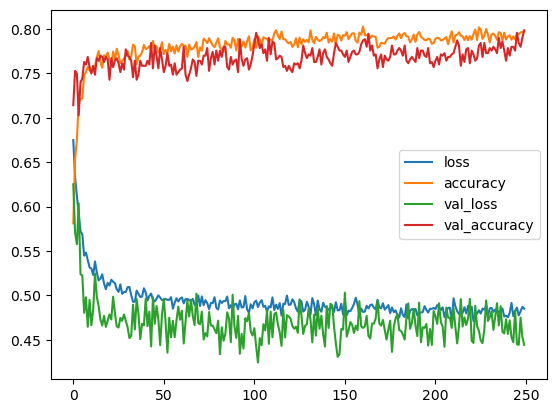

In [429]:
loss_df.plot()
plt.show()

In [430]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4216333329677582
accuracy:  0.8113333582878113


In [431]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

197/197 [==============================] - 0s 692us/step
[[4215  802]
 [ 317  966]]
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      5017
           1       0.55      0.75      0.63      1283

    accuracy                           0.82      6300
   macro avg       0.74      0.80      0.76      6300
weighted avg       0.85      0.82      0.83      6300



In [432]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 662us/step
[[1982  407]
 [ 159  452]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      2389
           1       0.53      0.74      0.61       611

    accuracy                           0.81      3000
   macro avg       0.73      0.78      0.75      3000
weighted avg       0.84      0.81      0.82      3000



In [433]:
y_pred = model.predict(X_test)

94/94 [==============================] - 0s 623us/step


In [434]:
y_train_pred = model.predict(X_train)

197/197 [==============================] - 0s 627us/step


In [435]:
roc_auc_score(y_test, y_pred)

0.8731632091713315

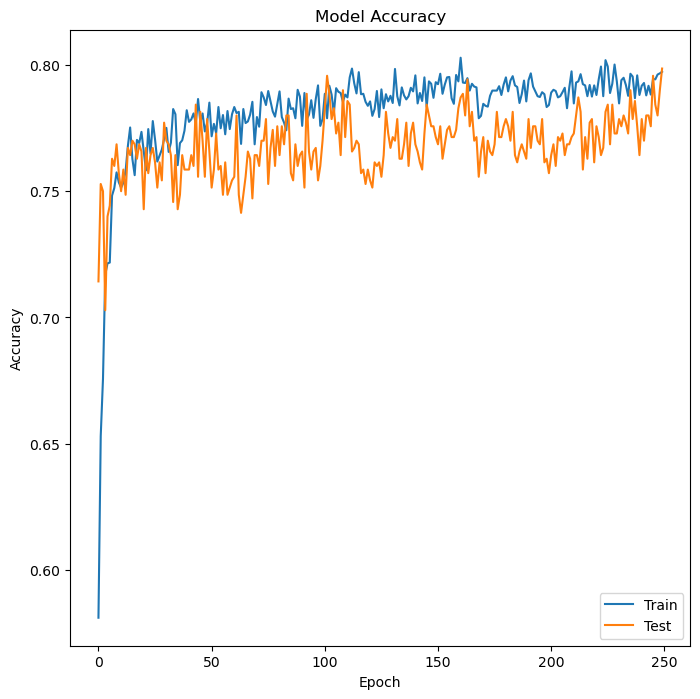

In [436]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(modelDo.history['accuracy'])
plt.plot(modelDo.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

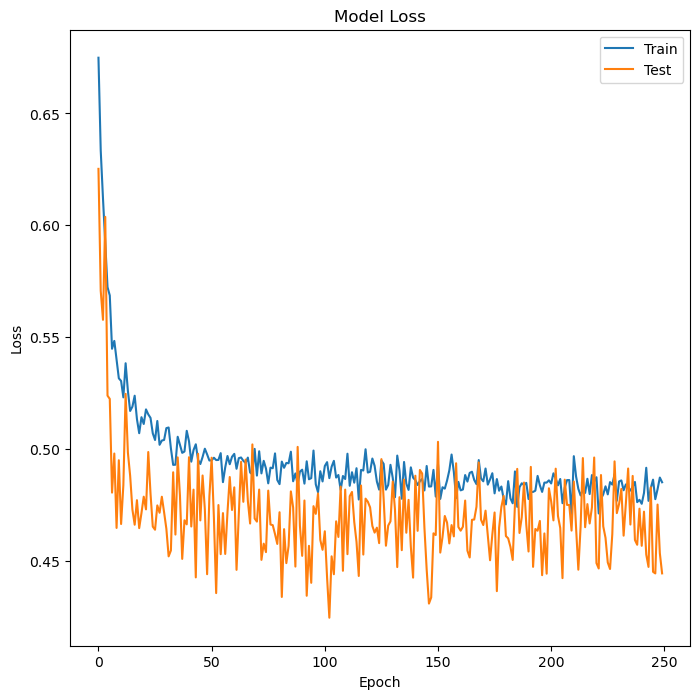

In [437]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(modelDo.history['loss'])
plt.plot(modelDo.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

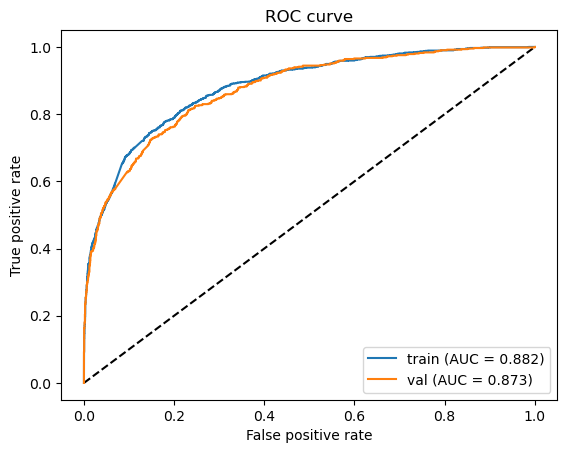

In [438]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [439]:
from tensorflow.keras.callbacks import EarlyStopping

In [440]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [441]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [442]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_valid,y_valid),
    batch_size=64,
    epochs=250,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights
)

Epoch 1/250
99/99 [==============================] - 1s 2ms/step - loss: 0.6777 - accuracy: 0.5484 - val_loss: 0.6246 - val_accuracy: 0.6286
Epoch 2/250
99/99 [==============================] - 0s 1ms/step - loss: 0.6077 - accuracy: 0.6444 - val_loss: 0.5740 - val_accuracy: 0.6829
Epoch 3/250
99/99 [==============================] - 0s 1ms/step - loss: 0.5648 - accuracy: 0.6927 - val_loss: 0.5445 - val_accuracy: 0.7171
Epoch 4/250
99/99 [==============================] - 0s 1ms/step - loss: 0.5336 - accuracy: 0.7248 - val_loss: 0.5397 - val_accuracy: 0.7157
Epoch 5/250
99/99 [==============================] - 0s 1ms/step - loss: 0.5113 - accuracy: 0.7392 - val_loss: 0.4851 - val_accuracy: 0.7729
Epoch 6/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7557 - val_loss: 0.4804 - val_accuracy: 0.7771
Epoch 7/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7602 - val_loss: 0.4796 - val_accuracy: 0.7800
Epoch 8/250
9

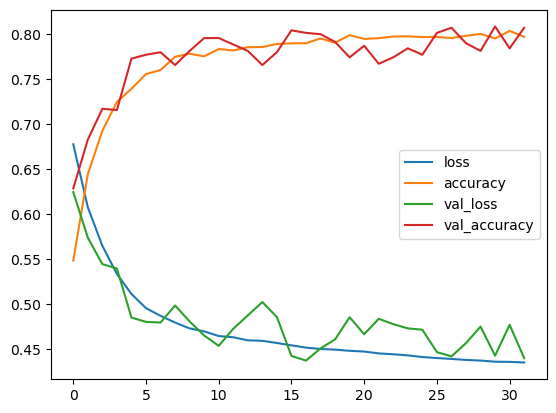

In [443]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [444]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4198249578475952
accuracy:  0.8116666674613953


In [445]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 698us/step
[[1981  408]
 [ 157  454]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      2389
           1       0.53      0.74      0.62       611

    accuracy                           0.81      3000
   macro avg       0.73      0.79      0.75      3000
weighted avg       0.85      0.81      0.82      3000



#### Monitor the "val_recall" as metric

In [446]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [447]:
modelVal=model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_valid,y_valid),
    batch_size=64,
    epochs=250,
    verbose=1,
    callbacks=[early_stop],
    class_weight=class_weights
)

Epoch 1/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4517 - accuracy: 0.7935 - val_loss: 0.4468 - val_accuracy: 0.8014
Epoch 2/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.7954 - val_loss: 0.4367 - val_accuracy: 0.8100
Epoch 3/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.7924 - val_loss: 0.4504 - val_accuracy: 0.8000
Epoch 4/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.7976 - val_loss: 0.4788 - val_accuracy: 0.7771
Epoch 5/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.7948 - val_loss: 0.4517 - val_accuracy: 0.7986
Epoch 6/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.7949 - val_loss: 0.4502 - val_accuracy: 0.8043
Epoch 7/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4445 - accuracy: 0.7933 - val_loss: 0.4584 - val_accuracy: 0.7900
Epoch 8/250
9

Epoch 23/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8032 - val_loss: 0.4850 - val_accuracy: 0.7743
Epoch 24/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8032 - val_loss: 0.4730 - val_accuracy: 0.7857
Epoch 25/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8006 - val_loss: 0.4743 - val_accuracy: 0.7814
Epoch 26/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8025 - val_loss: 0.4546 - val_accuracy: 0.7971
Epoch 27/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8017 - val_loss: 0.4439 - val_accuracy: 0.8057
Epoch 28/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8029 - val_loss: 0.4650 - val_accuracy: 0.7943
Epoch 29/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8013 - val_loss: 0.4810 - val_accuracy: 0.7843
Epoch 

Epoch 45/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8110 - val_loss: 0.4762 - val_accuracy: 0.7914
Epoch 46/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8100 - val_loss: 0.4291 - val_accuracy: 0.8129
Epoch 47/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.8111 - val_loss: 0.5118 - val_accuracy: 0.7671
Epoch 48/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.8043 - val_loss: 0.4704 - val_accuracy: 0.7900
Epoch 49/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8079 - val_loss: 0.4566 - val_accuracy: 0.8000
Epoch 50/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8086 - val_loss: 0.4380 - val_accuracy: 0.8086
Epoch 51/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8133 - val_loss: 0.5095 - val_accuracy: 0.7643
Epoch 

Epoch 67/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8122 - val_loss: 0.4667 - val_accuracy: 0.8000
Epoch 68/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.8175 - val_loss: 0.4713 - val_accuracy: 0.7900
Epoch 69/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8132 - val_loss: 0.4902 - val_accuracy: 0.7829
Epoch 70/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.8106 - val_loss: 0.4698 - val_accuracy: 0.7886
Epoch 71/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8138 - val_loss: 0.4744 - val_accuracy: 0.7886
Epoch 72/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8165 - val_loss: 0.4824 - val_accuracy: 0.7900
Epoch 73/250
99/99 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8127 - val_loss: 0.4481 - val_accuracy: 0.7986
Epoch 

Epoch 89/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.8168 - val_loss: 0.4904 - val_accuracy: 0.7786
Epoch 90/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8173 - val_loss: 0.4769 - val_accuracy: 0.7800
Epoch 91/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8198 - val_loss: 0.4565 - val_accuracy: 0.7971
Epoch 92/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3949 - accuracy: 0.8195 - val_loss: 0.5101 - val_accuracy: 0.7700
Epoch 93/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8122 - val_loss: 0.4536 - val_accuracy: 0.8014
Epoch 94/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8183 - val_loss: 0.4459 - val_accuracy: 0.8057
Epoch 95/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8176 - val_loss: 0.4418 - val_accuracy: 0.8057
Epoch 

Epoch 111/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3875 - accuracy: 0.8216 - val_loss: 0.4467 - val_accuracy: 0.8000
Epoch 112/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3877 - accuracy: 0.8232 - val_loss: 0.4896 - val_accuracy: 0.7800
Epoch 113/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3869 - accuracy: 0.8210 - val_loss: 0.5036 - val_accuracy: 0.7671
Epoch 114/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3861 - accuracy: 0.8181 - val_loss: 0.5037 - val_accuracy: 0.7657
Epoch 115/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3893 - accuracy: 0.8198 - val_loss: 0.4879 - val_accuracy: 0.7743
Epoch 116/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3871 - accuracy: 0.8217 - val_loss: 0.4962 - val_accuracy: 0.7714
Epoch 117/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3848 - accuracy: 0.8205 - val_loss: 0.4984 - val_accuracy: 0.7743

Epoch 133/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3812 - accuracy: 0.8256 - val_loss: 0.4561 - val_accuracy: 0.7914
Epoch 134/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.8249 - val_loss: 0.4764 - val_accuracy: 0.7829
Epoch 135/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.8267 - val_loss: 0.4793 - val_accuracy: 0.7800
Epoch 136/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8254 - val_loss: 0.4950 - val_accuracy: 0.7800
Epoch 137/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3806 - accuracy: 0.8259 - val_loss: 0.4724 - val_accuracy: 0.7771
Epoch 138/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.8235 - val_loss: 0.4936 - val_accuracy: 0.7729
Epoch 139/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8270 - val_loss: 0.4817 - val_accuracy: 0.7814

Epoch 155/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3738 - accuracy: 0.8278 - val_loss: 0.5301 - val_accuracy: 0.7714
Epoch 156/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3736 - accuracy: 0.8267 - val_loss: 0.4966 - val_accuracy: 0.7800
Epoch 157/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3740 - accuracy: 0.8284 - val_loss: 0.4891 - val_accuracy: 0.7757
Epoch 158/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8279 - val_loss: 0.4999 - val_accuracy: 0.7714
Epoch 159/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3727 - accuracy: 0.8278 - val_loss: 0.5141 - val_accuracy: 0.7686
Epoch 160/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8290 - val_loss: 0.4921 - val_accuracy: 0.7757
Epoch 161/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3722 - accuracy: 0.8297 - val_loss: 0.4963 - val_accuracy: 0.7814

Epoch 177/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8311 - val_loss: 0.5001 - val_accuracy: 0.7871
Epoch 178/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3675 - accuracy: 0.8271 - val_loss: 0.4932 - val_accuracy: 0.7757
Epoch 179/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.8297 - val_loss: 0.4885 - val_accuracy: 0.7929
Epoch 180/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.8313 - val_loss: 0.5094 - val_accuracy: 0.7814
Epoch 181/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8335 - val_loss: 0.5046 - val_accuracy: 0.7714
Epoch 182/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8303 - val_loss: 0.5297 - val_accuracy: 0.7714
Epoch 183/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3659 - accuracy: 0.8314 - val_loss: 0.5132 - val_accuracy: 0.7771

Epoch 199/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8276 - val_loss: 0.4694 - val_accuracy: 0.7986
Epoch 200/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8340 - val_loss: 0.4783 - val_accuracy: 0.8014
Epoch 201/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3591 - accuracy: 0.8370 - val_loss: 0.5198 - val_accuracy: 0.7771
Epoch 202/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8292 - val_loss: 0.5094 - val_accuracy: 0.7800
Epoch 203/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3600 - accuracy: 0.8367 - val_loss: 0.5138 - val_accuracy: 0.7843
Epoch 204/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.8338 - val_loss: 0.4819 - val_accuracy: 0.7900
Epoch 205/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.8346 - val_loss: 0.4976 - val_accuracy: 0.7857

Epoch 221/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8338 - val_loss: 0.5020 - val_accuracy: 0.7843
Epoch 222/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8349 - val_loss: 0.5079 - val_accuracy: 0.7786
Epoch 223/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8363 - val_loss: 0.5054 - val_accuracy: 0.7857
Epoch 224/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3536 - accuracy: 0.8354 - val_loss: 0.4903 - val_accuracy: 0.7900
Epoch 225/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3553 - accuracy: 0.8368 - val_loss: 0.5180 - val_accuracy: 0.7771
Epoch 226/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.8346 - val_loss: 0.4949 - val_accuracy: 0.7843
Epoch 227/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3550 - accuracy: 0.8343 - val_loss: 0.4699 - val_accuracy: 0.7929

Epoch 243/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.8378 - val_loss: 0.5192 - val_accuracy: 0.7771
Epoch 244/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3517 - accuracy: 0.8402 - val_loss: 0.4781 - val_accuracy: 0.7943
Epoch 245/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3515 - accuracy: 0.8405 - val_loss: 0.4959 - val_accuracy: 0.7886
Epoch 246/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3534 - accuracy: 0.8378 - val_loss: 0.4900 - val_accuracy: 0.7900
Epoch 247/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8367 - val_loss: 0.4824 - val_accuracy: 0.7914
Epoch 248/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8390 - val_loss: 0.5049 - val_accuracy: 0.7814
Epoch 249/250
99/99 [==============================] - 0s 1ms/step - loss: 0.3537 - accuracy: 0.8395 - val_loss: 0.5197 - val_accuracy: 0.7657

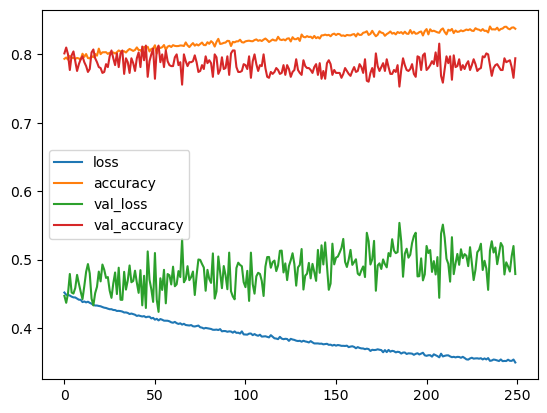

In [448]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.show()

In [449]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4556082487106323
accuracy:  0.7893333435058594


In [450]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

197/197 [==============================] - 0s 696us/step
[[4313  704]
 [ 220 1063]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      5017
           1       0.60      0.83      0.70      1283

    accuracy                           0.85      6300
   macro avg       0.78      0.84      0.80      6300
weighted avg       0.88      0.85      0.86      6300



In [451]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 686us/step
[[1939  450]
 [ 182  429]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86      2389
           1       0.49      0.70      0.58       611

    accuracy                           0.79      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.83      0.79      0.80      3000



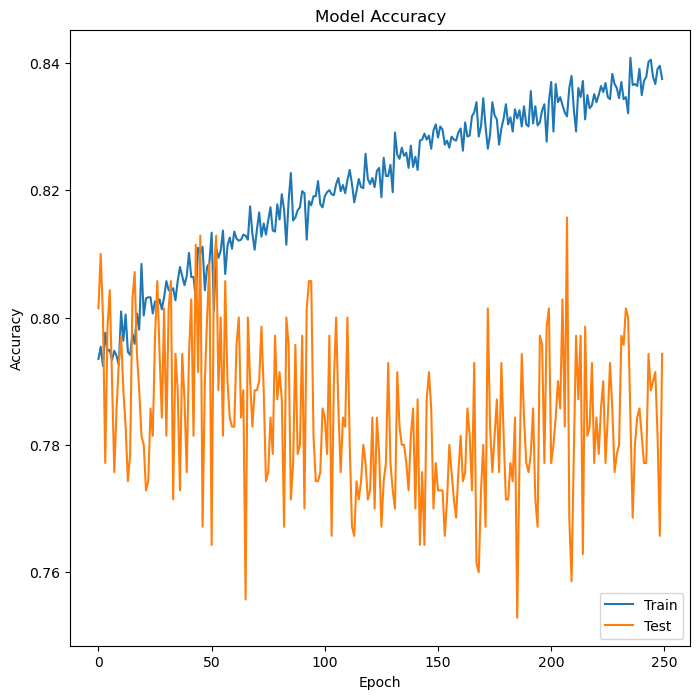

In [452]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(modelVal.history['accuracy'])
plt.plot(modelVal.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

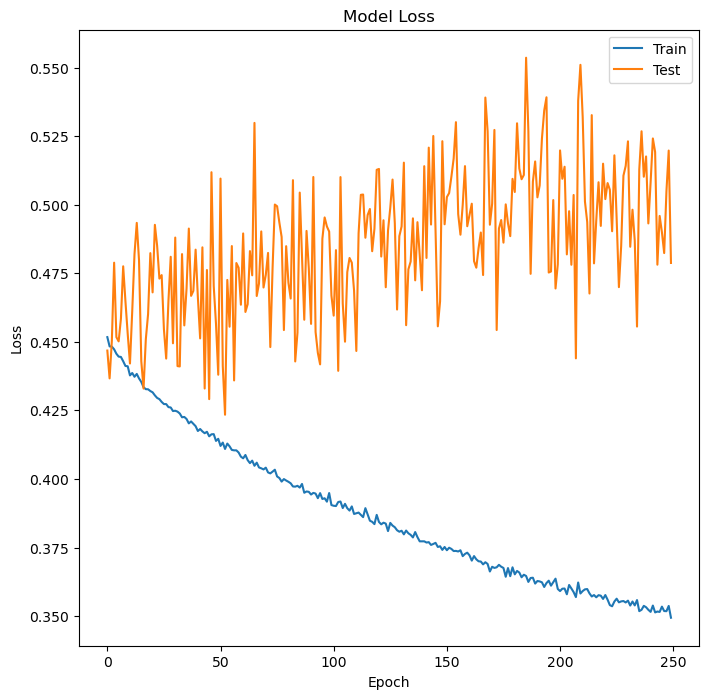

In [453]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(modelVal.history['loss'])
plt.plot(modelVal.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [454]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

197/197 [==============================] - 0s 650us/step


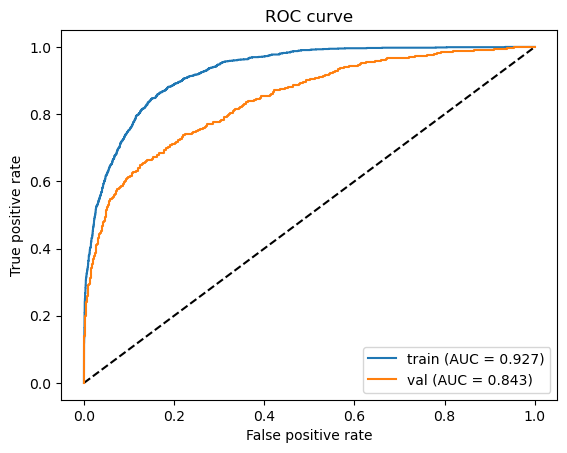

In [455]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## Optuna

In [456]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [457]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [458]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    n_units3 = trial.suggest_int("n_units3", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
       validation_data=(X_valid,y_valid),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
        
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [459]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 17:51:37,231] A new study created in memory with name: no-name-188274b7-79e9-4cec-a43a-9c3c295fcd77
C:\Users\sh-oo\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
C:\Users\sh-oo\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
C:\Users\sh-oo\anaconda3\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'> which is of type 

Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-10-30 17:51:40,336] Trial 0 finished with value: 0.7963333129882812 and parameters: {'n_units1': 67, 'n_units2': 9, 'n_units3': 62, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.10600186142522598, 'w0': 2.4679229957451656, 'w1': 2.6442073455302038}. Best is trial 0 with value: 0.7963333129882812.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-10-30 17:51:43,626] Trial 1 finished with value: 0.8613333106040955 and parameters: {'n_units1': 24, 'n_units2': 69, 'n_units3': 114, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0025366399060814666, 'w0': 0.010569868744685946, 'w1': 0.013936234525471923}. Best is trial 1 with value: 0.8613333106040955.


Restoring model weights from the end of the best epoch: 53.
Epoch 68: early stopping


[I 2023-10-30 17:51:52,100] Trial 2 finished with value: 0.6546666622161865 and parameters: {'n_units1': 71, 'n_units2': 27, 'n_units3': 121, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 9.077578865799766e-05, 'w0': 0.051017194891368876, 'w1': 0.4801385286490294}. Best is trial 1 with value: 0.8613333106040955.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-10-30 17:51:55,445] Trial 3 finished with value: 0.8636666536331177 and parameters: {'n_units1': 24, 'n_units2': 109, 'n_units3': 61, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.010043856372655119, 'w0': 0.25907980087314925, 'w1': 0.5593254988494561}. Best is trial 3 with value: 0.8636666536331177.


Restoring model weights from the end of the best epoch: 14.
Epoch 29: early stopping


[I 2023-10-30 17:51:59,490] Trial 4 finished with value: 0.6060000061988831 and parameters: {'n_units1': 86, 'n_units2': 103, 'n_units3': 12, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.005456000534804906, 'w0': 0.04197467520624192, 'w1': 0.48660433548635945}. Best is trial 3 with value: 0.8636666536331177.


Restoring model weights from the end of the best epoch: 44.
Epoch 59: early stopping


[I 2023-10-30 17:52:07,958] Trial 5 finished with value: 0.862666666507721 and parameters: {'n_units1': 92, 'n_units2': 118, 'n_units3': 59, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 7.45345476228927e-05, 'w0': 0.01731943603819182, 'w1': 0.024697705379231747}. Best is trial 3 with value: 0.8636666536331177.


Restoring model weights from the end of the best epoch: 20.
Epoch 35: early stopping


[I 2023-10-30 17:52:13,189] Trial 6 finished with value: 0.8153333067893982 and parameters: {'n_units1': 16, 'n_units2': 36, 'n_units3': 13, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0022542120538796722, 'w0': 1.883477135860221, 'w1': 0.10716190997704401}. Best is trial 3 with value: 0.8636666536331177.
[I 2023-10-30 17:52:25,010] Trial 7 finished with value: 0.7963333129882812 and parameters: {'n_units1': 80, 'n_units2': 31, 'n_units3': 29, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.008763612582870894, 'w0': 0.04859331680317738, 'w1': 0.02990643029962475}. Best is trial 3 with value: 0.8636666536331177.


Restoring model weights from the end of the best epoch: 26.
Epoch 41: early stopping


[I 2023-10-30 17:52:30,408] Trial 8 finished with value: 0.7963333129882812 and parameters: {'n_units1': 117, 'n_units2': 43, 'n_units3': 80, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0026497772844064973, 'w0': 0.5745231144191939, 'w1': 0.15775791926791535}. Best is trial 3 with value: 0.8636666536331177.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-10-30 17:52:34,324] Trial 9 finished with value: 0.7490000128746033 and parameters: {'n_units1': 95, 'n_units2': 122, 'n_units3': 94, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.010223816798360971, 'w0': 0.0285938977539126, 'w1': 0.17555595545461095}. Best is trial 3 with value: 0.8636666536331177.


{'n_units1': 24,
 'n_units2': 109,
 'n_units3': 61,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.010043856372655119,
 'w0': 0.25907980087314925,
 'w1': 0.5593254988494561}

In [460]:
# build model with optuna parameters
unit1, unit2,unit3, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(unit2, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(unit3, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

# train model
modelOp=model.fit(
    X_train,
    y_train,
    validation_data=(X_train,y_train),
    batch_size=64,
    epochs=250,
    callbacks=[early_stop],
    verbose=1,
    class_weight= {0: w0, 1: w1}
)

Epoch 1/250
99/99 [==============================] - 1s 3ms/step - loss: 0.1949 - accuracy: 0.7570 - val_loss: 0.4704 - val_accuracy: 0.8114
Epoch 2/250
99/99 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.7973 - val_loss: 0.4308 - val_accuracy: 0.8105
Epoch 3/250
99/99 [==============================] - 0s 2ms/step - loss: 0.1661 - accuracy: 0.8194 - val_loss: 0.4355 - val_accuracy: 0.8502
Epoch 4/250
99/99 [==============================] - 0s 2ms/step - loss: 0.1613 - accuracy: 0.8286 - val_loss: 0.3811 - val_accuracy: 0.8494
Epoch 5/250
99/99 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.8295 - val_loss: 0.4087 - val_accuracy: 0.8417
Epoch 6/250
99/99 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.8238 - val_loss: 0.3917 - val_accuracy: 0.8532
Epoch 7/250
99/99 [==============================] - 0s 2ms/step - loss: 0.1573 - accuracy: 0.8257 - val_loss: 0.3758 - val_accuracy: 0.8537
Epoch 8/250
9

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [461]:
modelhistory=model.history.history

In [462]:
loss,acc = model.evaluate(X_test,y_test)
print("Test Accuarcy:",acc)
print("Tets Loss:",loss)

94/94 [==============================] - 0s 782us/step - loss: 0.3476 - accuracy: 0.8690
Test Accuarcy: 0.8690000176429749
Tets Loss: 0.3476027548313141


In [463]:
loss_df = pd.DataFrame(modelhistory)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.194921  0.756984  0.470353      0.811429
1  0.175807  0.797302  0.430810      0.810476
2  0.166140  0.819365  0.435458      0.850159
3  0.161309  0.828571  0.381122      0.849365
4  0.158477  0.829524  0.408713      0.841746

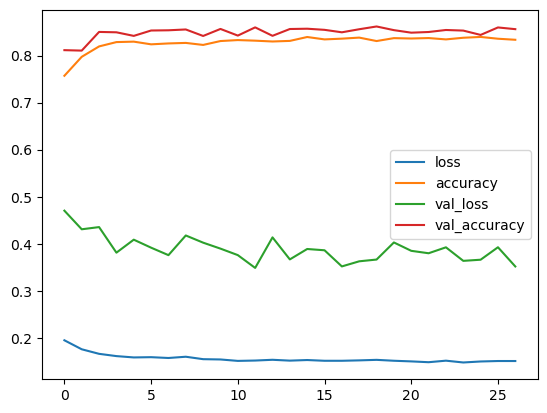

In [464]:
loss_df.plot()
plt.show()

In [465]:
y_pred = model.predict(X_test)

94/94 [==============================] - 0s 715us/step


In [466]:
y_train_pred = model.predict(X_train)

197/197 [==============================] - 0s 661us/step


In [467]:
roc_auc_score(y_test, y_pred)

0.8660931615786759

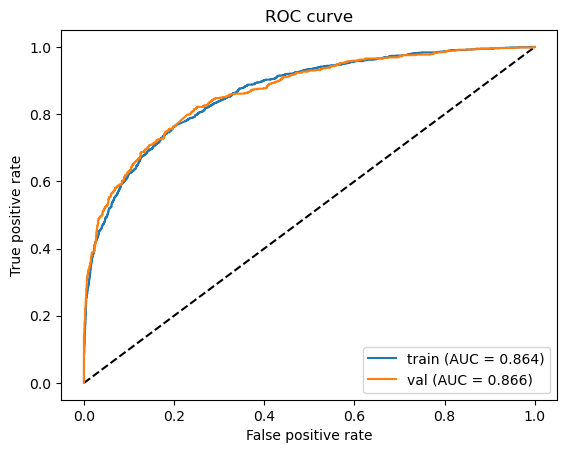

In [468]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

In [469]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

197/197 [==============================] - 0s 688us/step
[[4832  185]
 [ 698  585]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      5017
           1       0.76      0.46      0.57      1283

    accuracy                           0.86      6300
   macro avg       0.82      0.71      0.74      6300
weighted avg       0.85      0.86      0.85      6300



In [470]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 726us/step
[[2307   82]
 [ 311  300]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.79      0.49      0.60       611

    accuracy                           0.87      3000
   macro avg       0.83      0.73      0.76      3000
weighted avg       0.86      0.87      0.86      3000



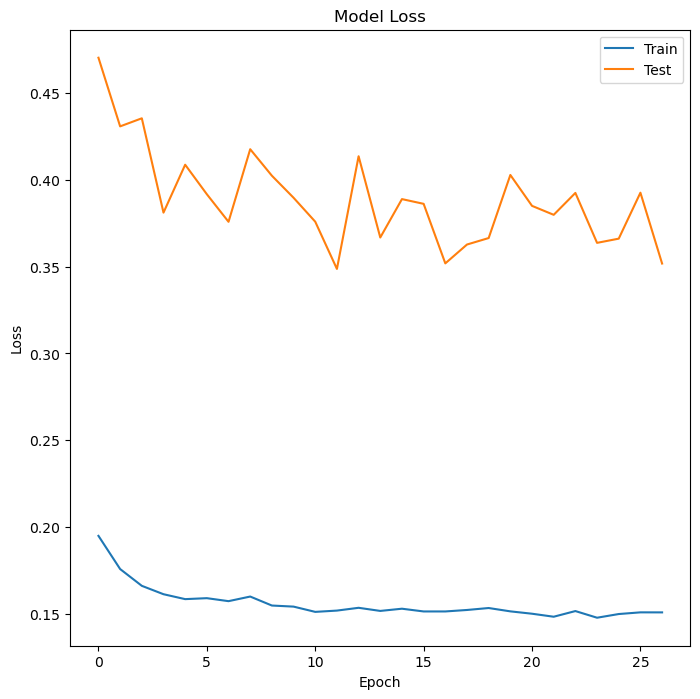

In [471]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(modelOp.history['loss'])
plt.plot(modelOp.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

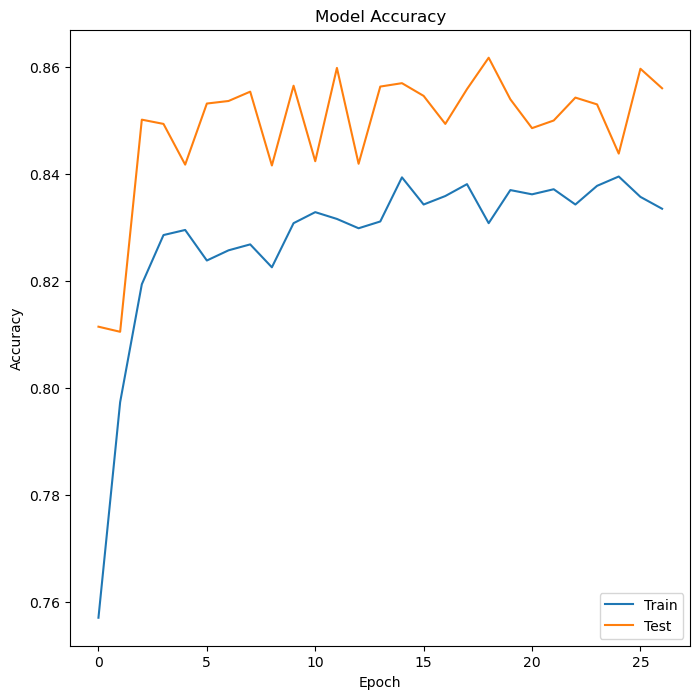

In [472]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(modelOp.history['accuracy'])
plt.plot(modelOp.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Final Model and Model Deployment

I decided to follow the my params and Dropout method

In [503]:

tf.random.set_seed(42)
model = Sequential()
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

# train model
modelOp=model.fit(
    X_train,
    y_train,
    validation_data=(X_train,y_train),
    batch_size=64,
    epochs=250,
    verbose=1,
    class_weight= class_weights
)

Epoch 1/250
99/99 [==============================] - 1s 3ms/step - loss: 0.6564 - accuracy: 0.6124 - val_loss: 0.5780 - val_accuracy: 0.7408
Epoch 2/250
99/99 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.6957 - val_loss: 0.5422 - val_accuracy: 0.7543
Epoch 3/250
99/99 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.7173 - val_loss: 0.4723 - val_accuracy: 0.7841
Epoch 4/250
99/99 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7543 - val_loss: 0.5252 - val_accuracy: 0.7560
Epoch 5/250
99/99 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.7398 - val_loss: 0.4868 - val_accuracy: 0.7513
Epoch 6/250
99/99 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7519 - val_loss: 0.4634 - val_accuracy: 0.7983
Epoch 7/250
99/99 [==============================] - 0s 2ms/step - loss: 0.5353 - accuracy: 0.7640 - val_loss: 0.4567 - val_accuracy: 0.8189
Epoch 8/250
9

Epoch 59/250
99/99 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7906 - val_loss: 0.4412 - val_accuracy: 0.8011
Epoch 60/250
99/99 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.7716 - val_loss: 0.4501 - val_accuracy: 0.7944
Epoch 61/250
99/99 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7776 - val_loss: 0.4544 - val_accuracy: 0.7846
Epoch 62/250
99/99 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7694 - val_loss: 0.4386 - val_accuracy: 0.7632
Epoch 63/250
99/99 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7400 - val_loss: 0.4654 - val_accuracy: 0.7283
Epoch 64/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7548 - val_loss: 0.4645 - val_accuracy: 0.7808
Epoch 65/250
99/99 [==============================] - 0s 2ms/step - loss: 0.5110 - accuracy: 0.7437 - val_loss: 0.4656 - val_accuracy: 0.7748
Epoch 

99/99 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7930 - val_loss: 0.4279 - val_accuracy: 0.8103
Epoch 117/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7981 - val_loss: 0.4417 - val_accuracy: 0.8176
Epoch 118/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7490 - val_loss: 0.4307 - val_accuracy: 0.8102
Epoch 119/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4959 - accuracy: 0.7908 - val_loss: 0.4341 - val_accuracy: 0.7952
Epoch 120/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7711 - val_loss: 0.4722 - val_accuracy: 0.8135
Epoch 121/250
99/99 [==============================] - 0s 2ms/step - loss: 0.5088 - accuracy: 0.7962 - val_loss: 0.4583 - val_accuracy: 0.8025
Epoch 122/250
99/99 [==============================] - 0s 2ms/step - loss: 0.5001 - accuracy: 0.7857 - val_loss: 0.4239 - val_accuracy: 0.8002
Epoch 123/250

99/99 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7921 - val_loss: 0.4025 - val_accuracy: 0.8065
Epoch 174/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7983 - val_loss: 0.4033 - val_accuracy: 0.8232
Epoch 175/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.7897 - val_loss: 0.4345 - val_accuracy: 0.8040
Epoch 176/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7944 - val_loss: 0.4310 - val_accuracy: 0.8184
Epoch 177/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.7765 - val_loss: 0.4430 - val_accuracy: 0.8068
Epoch 178/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7694 - val_loss: 0.4310 - val_accuracy: 0.7833
Epoch 179/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4966 - accuracy: 0.7435 - val_loss: 0.4208 - val_accuracy: 0.7968
Epoch 180/250

99/99 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.8010 - val_loss: 0.4499 - val_accuracy: 0.7706
Epoch 231/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7597 - val_loss: 0.4707 - val_accuracy: 0.7684
Epoch 232/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4877 - accuracy: 0.7613 - val_loss: 0.4403 - val_accuracy: 0.7976
Epoch 233/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7830 - val_loss: 0.4148 - val_accuracy: 0.8025
Epoch 234/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.8000 - val_loss: 0.4481 - val_accuracy: 0.8175
Epoch 235/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.7968 - val_loss: 0.4403 - val_accuracy: 0.8159
Epoch 236/250
99/99 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7951 - val_loss: 0.4249 - val_accuracy: 0.8178
Epoch 237/250

In [504]:
modelhistory=model.history.history
loss_df = pd.DataFrame(modelhistory)
loss_df.head()

loss  accuracy  val_loss  val_accuracy
0  0.656412  0.612381  0.577981      0.740794
1  0.606507  0.695714  0.542198      0.754286
2  0.581769  0.717302  0.472270      0.784127
3  0.559828  0.754286  0.525174      0.756032
4  0.549620  0.739841  0.486753      0.751270

In [505]:
y_train_pred = model.predict(X_train) > 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

197/197 [==============================] - 0s 636us/step
[[4342  675]
 [ 384  899]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89      5017
           1       0.57      0.70      0.63      1283

    accuracy                           0.83      6300
   macro avg       0.74      0.78      0.76      6300
weighted avg       0.85      0.83      0.84      6300



In [506]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

94/94 [==============================] - 0s 660us/step
[[2058  331]
 [ 176  435]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2389
           1       0.57      0.71      0.63       611

    accuracy                           0.83      3000
   macro avg       0.74      0.79      0.76      3000
weighted avg       0.85      0.83      0.84      3000



In [507]:
roc_auc_score(y_test, y_pred)

0.7866979657856282

In [508]:
y_pred = model.predict(X_test)

94/94 [==============================] - 0s 630us/step


In [509]:
y_train_pred = model.predict(X_train)

197/197 [==============================] - 0s 633us/step


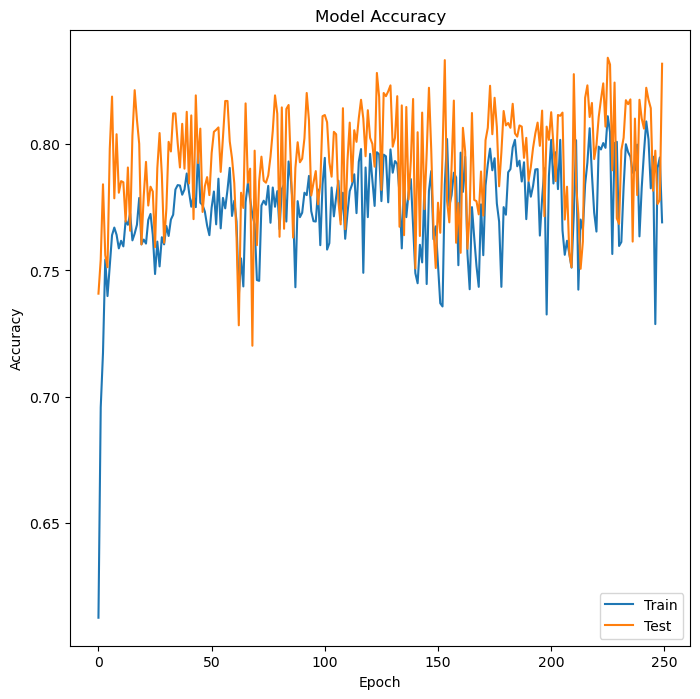

In [510]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(modelOp.history['accuracy'])
plt.plot(modelOp.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

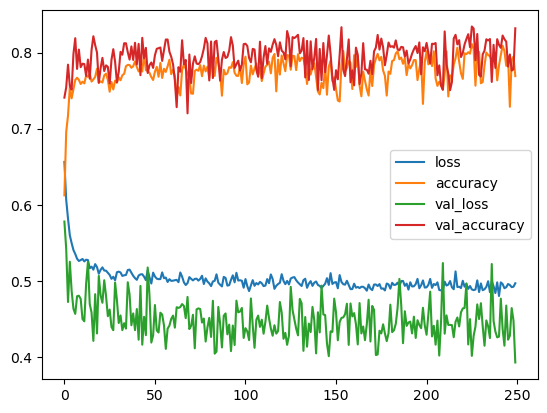

In [511]:
loss_df.plot()
plt.show()

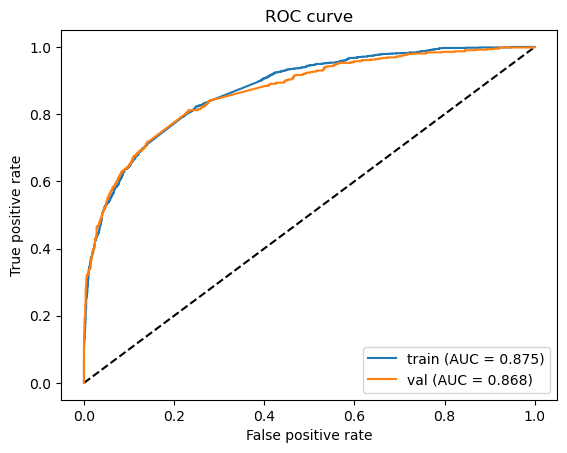

In [512]:
roc_auc_plot(y_train, y_train_pred,y_test, y_pred)

## Prediction

In [513]:
XArray=[]
yArray=[]
for x in range(len(X)):
    if x < 50:
        print("index: ", x)
        XArray.append(model.predict(X.loc[[x]]))
        yArray.append(y[x])
    else:
        break

index:  0
1/1 [==============================] - 0s 39ms/step
index:  1
1/1 [==============================] - 0s 12ms/step
index:  2
1/1 [==============================] - 0s 13ms/step
index:  3
1/1 [==============================] - 0s 12ms/step
index:  4
1/1 [==============================] - 0s 14ms/step
index:  5
1/1 [==============================] - 0s 12ms/step
index:  6
1/1 [==============================] - 0s 13ms/step
index:  7
1/1 [==============================] - 0s 13ms/step
index:  8
1/1 [==============================] - 0s 11ms/step
index:  9
1/1 [==============================] - 0s 12ms/step
index:  10
1/1 [==============================] - 0s 13ms/step
index:  11
1/1 [==============================] - 0s 13ms/step
index:  12
1/1 [==============================] - 0s 13ms/step
index:  13
1/1 [==============================] - 0s 13ms/step
index:  14
1/1 [==============================] - 0s 12ms/step
index:  15
1/1 [==============================] - 0s 13ms/step
in

In [485]:
prediction = pd.DataFrame({'Predicted': XArray, 'True Label': yArray})

In [486]:
prediction

Predicted  True Label
0   [[0.599328]]           1
1        [[1.0]]           0
2        [[1.0]]           1
3   [[0.599328]]           0
4        [[1.0]]           0
5        [[1.0]]           1
6   [[0.599328]]           0
7        [[1.0]]           1
8        [[1.0]]           0
9        [[1.0]]           0
10       [[1.0]]           0
11  [[0.599328]]           0
12  [[0.599328]]           0
13  [[0.599328]]           0
14  [[0.599328]]           0
15       [[1.0]]           0
16       [[1.0]]           1
17  [[0.599328]]           0
18  [[0.599328]]           0
19  [[0.599328]]           0
20  [[0.599328]]           0
21  [[0.599328]]           0
22  [[0.599328]]           1
23  [[0.599328]]           0
24  [[0.599328]]           0
25  [[0.599328]]           0
26       [[1.0]]           0
27  [[0.599328]]           0
28       [[1.0]]           0
29       [[1.0]]           0
30  [[0.599328]]           1
31       [[1.0]]           0
32       [[1.0]]           0
33  [[0.599328]]           0
34  [[0.599328]]           0
35       [[1.0]]           1
36       [[1.0]]           0
37       [[1.0]]           0
38  [[0.599328]]           0
39  [[0.599328]]           0
40  [[0.599328]]           0
41       [[1.0]]           1
42       [[1.0]]           0
43       [[1.0]]           1
44       [[1.0]]           0
45       [[1.0]]           0
46       [[1.0]]           1
47       [[1.0]]           1
48       [[1.0]]           0
49       [[1.0]]           0

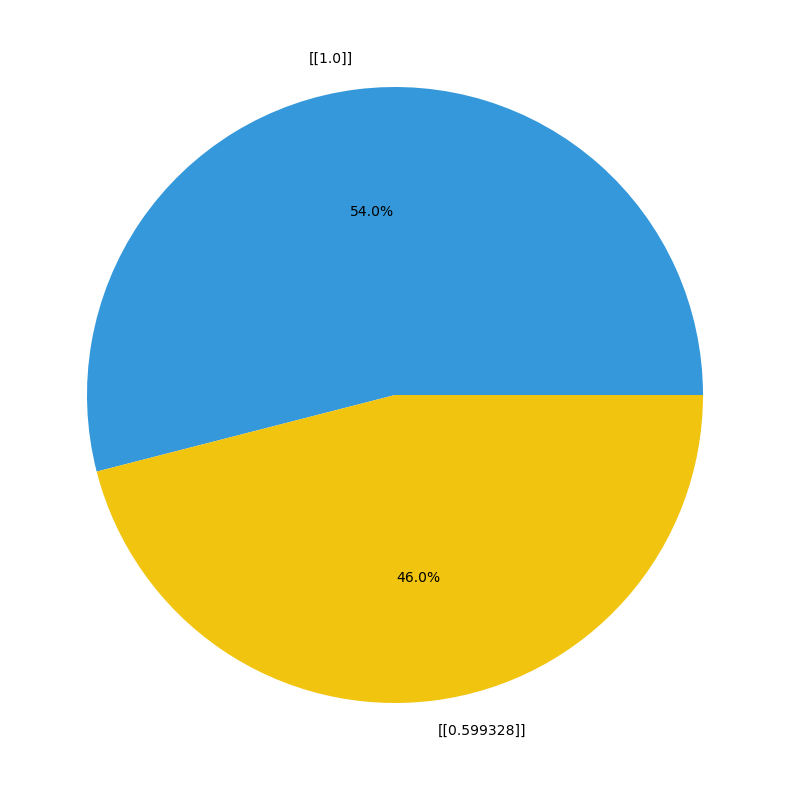

In [487]:
#creates a pie chart to visualize predictions vs actual value for the first 50 in dataset 
custom_colors = ['#3498DB', '#F1C40F']  # Replace these colors
prediction["Predicted"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(10, 10), colors=custom_colors)
plt.ylabel("")
plt.show()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___